In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import re
import random
from scipy.stats import norm ,t
import pingouin
from statsmodels.stats.proportion import proportions_ztest
import scipy
import warnings
warnings.filterwarnings("ignore")

C:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


**Columns Information**

- stag : Experience (time)
- Event : Employee turnover
- gender : Employee's gender, female(f), or male(m)
- age : Employee's age (year)
- industry : Employee's Industry
- profession : Employee's profession
- traffic : From what pipelene employee came to the company. You contacted the company directly
- coach : Presence of a coach (training) on probation
- head_gender : head (supervisor) gender
- greywage : The salary does not seem to the tax authorities. Greywage in Russia or Ukraine means that the employer officially reports only part of the salary, while the remaining amount is paid unofficially and is not subject to taxation.

- way : Employee's way of transportation
- extraversion : Extraversion score
- independent : Independend score
- selfcontrol : Selfcontrol score
- anxiety Anxiety score
- navator : Novator score

In [2]:
# Setting the random seed for numpy and random the save the same results 
np.random.seed(42)
random.seed(42)

C:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
data = pd.read_csv("turnover.csv", encoding='latin')
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
print("Data shape:",data.shape)

Data shape: (1129, 16)


In [5]:
print("Number of Null values for each column:")
data.isna().sum()

Number of Null values for each column:


stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [6]:
print("Number of duplicates: ",data.duplicated().sum())

Number of duplicates:  13


In [7]:
#show duplacates 
data[data.duplicated()]

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
38,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,5.4,5.5,4.9,4.8,4.4
39,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,6.2,6.2,4.9,3.3,2.9
61,15.572895,1,f,24.0,Retail,HR,youjs,no,f,white,foot,6.2,7.6,3.3,3.3,6.7
144,78.685832,1,f,31.0,Banks,HR,rabrecNErab,no,f,grey,bus,3.8,4.1,7.2,8.7,2.1
273,12.024641,1,m,30.0,Retail,Sales,rabrecNErab,no,m,grey,car,5.4,4.1,4.9,6.3,6.0
345,40.312115,0,f,29.0,manufacture,HR,rabrecNErab,my head,m,white,foot,6.2,3.4,4.1,7.9,7.5
462,1.117043,1,f,54.0,Pharma,HR,rabrecNErab,no,m,white,car,4.6,8.4,5.7,4.0,4.4
691,39.227926,1,f,37.0,Retail,HR,friends,no,f,white,car,6.2,6.9,4.1,6.3,8.3
692,39.227926,1,f,37.0,Retail,HR,friends,no,f,white,car,3.8,9.1,4.9,5.6,7.5


In [8]:
data[data["stag"] == 10.61190965]

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
757,10.61191,0,m,40.0,State,Finanñe,rabrecNErab,no,f,white,car,4.6,7.6,5.7,6.3,7.5
1124,10.61191,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.61191,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3


In [9]:
#drop duplicates 
data.drop_duplicates(inplace=True)

In [10]:
#recheck for duplicates 
print("Number of duplicates: ",data.duplicated().sum())

Number of duplicates:  0


In [11]:
print("New Data shape",data.shape)

New Data shape (1116, 16)


In [12]:
#check data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1116 non-null   float64
 1   event         1116 non-null   int64  
 2   gender        1116 non-null   object 
 3   age           1116 non-null   float64
 4   industry      1116 non-null   object 
 5   profession    1116 non-null   object 
 6   traffic       1116 non-null   object 
 7   coach         1116 non-null   object 
 8   head_gender   1116 non-null   object 
 9   greywage      1116 non-null   object 
 10  way           1116 non-null   object 
 11  extraversion  1116 non-null   float64
 12  independ      1116 non-null   float64
 13  selfcontrol   1116 non-null   float64
 14  anxiety       1116 non-null   float64
 15  novator       1116 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 148.2+ KB


# Exploratory Data analysis

## Functions

In [13]:
#take advantage of the CLT
def create_bootstrap_distribution(data,column):
    bootstrap_mean = []
    for i in range(5000):
        sample= data.sample(frac=1,replace=True)
        bootstrap_mean.append(sample[column].mean())
    return pd.Series(bootstrap_mean)

In [14]:
def ttest(left_distribution,right_distribution,test_type):
    #initialise sample statistics
    left_mean = left_distribution.mean()
    right_mean = right_distribution.mean()
    left_std_err = left_distribution.std()
    right_std_err = right_distribution.std()
    left_n = len(left_distribution)
    right_n = len(right_distribution) 

    #calculate t-score
    numerator =  left_mean - right_mean 
    denominator = np.sqrt((right_std_err ** 2)/ right_n + (left_std_err **2)/left_n )
    t_stat = numerator / denominator

    #degree of freedom 
    dof = right_n + left_n - 2 
    if test_type == "less":
        p_value = t.cdf(t_stat,dof)
    elif test_type == "greater":
        p_value = 1 - t.cdf(t_stat,dof)
    elif test_type == "two-tailed":
        p_value = t.cdf(-t_stat,dof) + 1-t.cdf(t_stat,dof)
    else:
        raise ValueError("test_type must be one of ['less', 'greater', 'two-tailed']")
    return t_stat, p_value
        


## Turnover

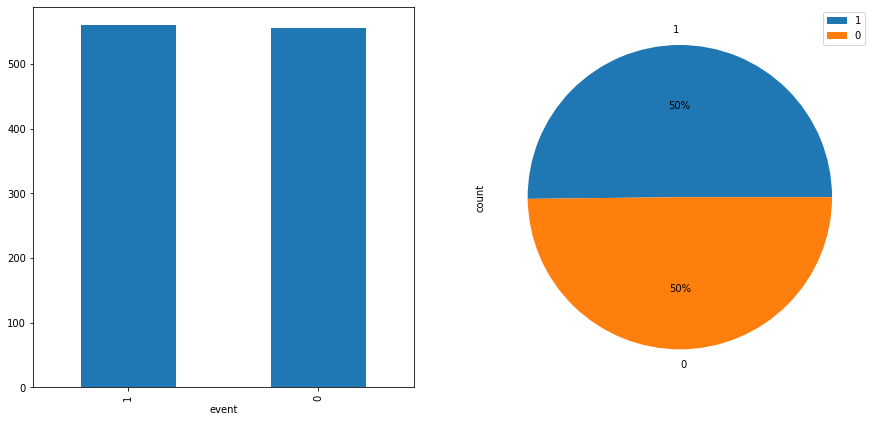

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(121)
data["event"].value_counts().plot(kind="bar")
plt.subplot(122)
data["event"].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.legend()

## Employees experience 

### Employees experience distribution

<AxesSubplot:ylabel='stag'>

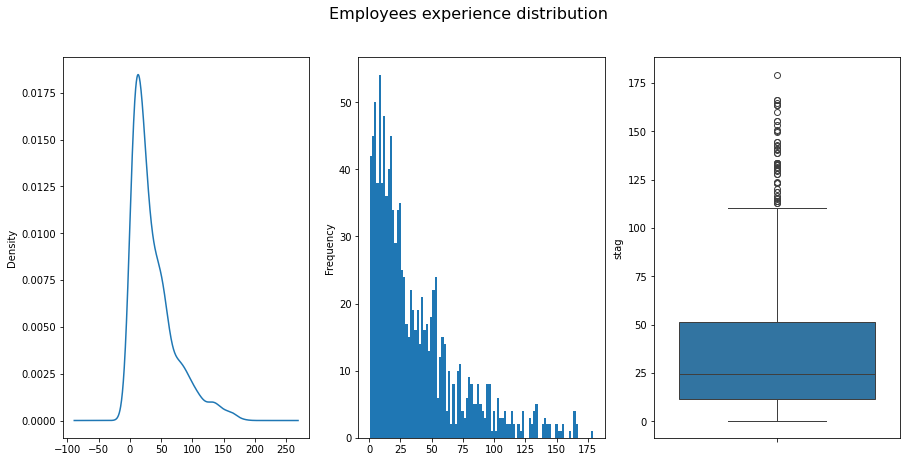

In [16]:
plt.figure(figsize=(15,7))
plt.suptitle("Employees experience distribution", size=16)
plt.subplot(131)
data["stag"].plot(kind="kde")
plt.subplot(132)
data["stag"].plot(kind="hist",bins=100)
plt.subplot(133)
sns.boxplot(data["stag"])

In [17]:
print("Employees average experiance: ",data["stag"].mean())
print("50 % of the employees have an experience < ",data["stag"].median())

Employees average experiance:  36.701802418433694
50 % of the employees have an experience <  24.44353183


In [18]:
bootstrap_experiance_mean = create_bootstrap_distribution(data,"stag")


<AxesSubplot:ylabel='Frequency'>

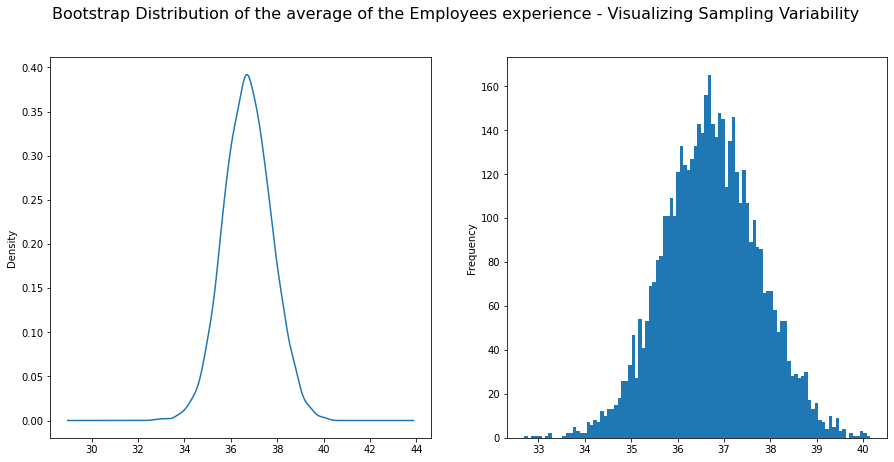

In [19]:
plt.figure(figsize=(15,7))
plt.suptitle("Bootstrap Distribution of the average of the Employees experience - Visualizing Sampling Variability", size=16)
plt.subplot(121)
bootstrap_experiance_mean.plot(kind="kde")
plt.subplot(122)
bootstrap_experiance_mean.plot(kind="hist",bins=100)


In [20]:
print("Popluation average Experience: ",bootstrap_experiance_mean.mean())

Popluation average Experience:  36.72872890420078


- data Experience average is very similar to our bootstrap average. no need for hypothesis testing 

In [21]:
lower = np.quantile(bootstrap_experiance_mean,0.025)
upper = np.quantile(bootstrap_experiance_mean,0.975)

print(f"Confidence Interval 95%: [{lower},{upper}]")

Confidence Interval 95%: [34.752904550333085,38.758209504297135]


## Experiance vs Turnover

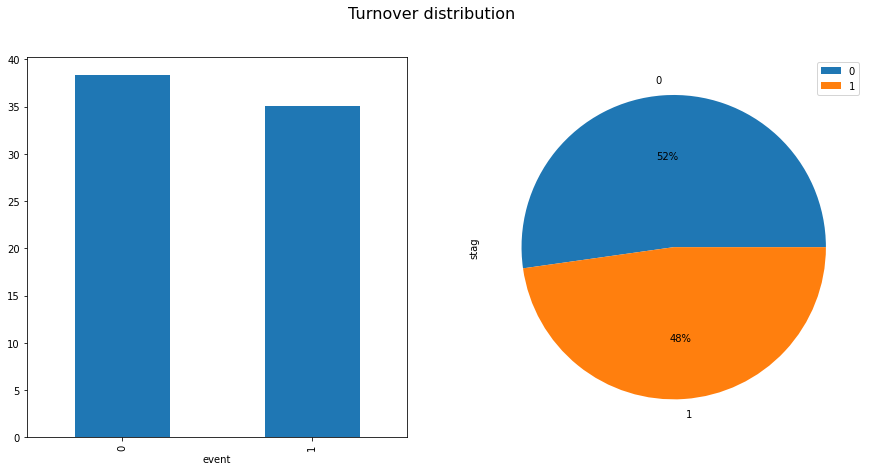

In [22]:
plt.figure(figsize=(15,7))
plt.suptitle("Turnover distribution", size=16)

plt.subplot(121)
data.groupby("event")["stag"].mean().plot(kind="bar")
plt.subplot(122)
data.groupby("event")["stag"].mean().plot(kind="pie",autopct='%1.0f%%')
plt.legend()

In [23]:
print("Average Experience of Employees: Turnover vs. No Turnover:")
print("Turnover :",data[data["event"] == 1]["stag"].mean() )
print("No Turnover:",data[data["event"] == 0]["stag"].mean() )


Average Experience of Employees: Turnover vs. No Turnover:
Turnover : 35.074332649214284
No Turnover: 38.34098060325899


**Hypothesis Testing:**
- H0 : The average experience of people who left the company (turnover) is the **same** as the average experience of those who stayed (no turnover).
- H1 : The average experience of people who left the company (turnover) is **less than** the average experience of those who stayed (no turnover).

In [24]:
#create bootstrap distribution of each poplutaion average
bootstrap_experiance_turnover = create_bootstrap_distribution(data[data["event"] == 1],"stag")
bootstrap_experiance_no_turnover = create_bootstrap_distribution(data[data["event"] == 0],"stag")

<AxesSubplot:ylabel='Frequency'>

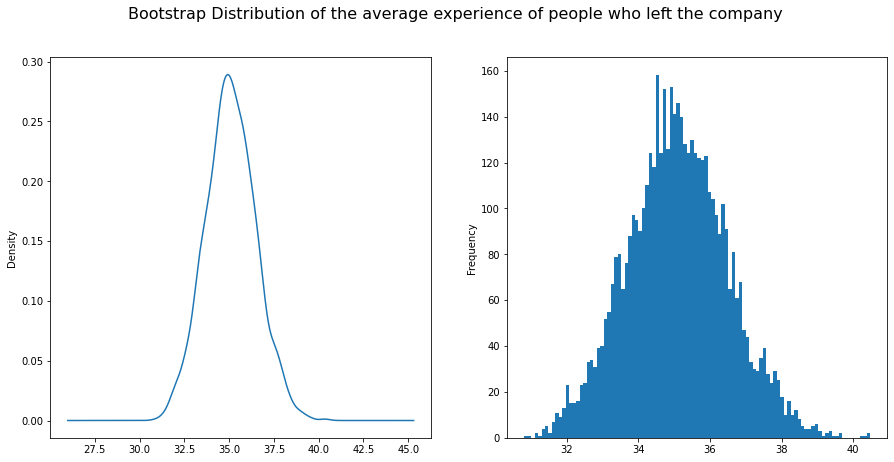

In [25]:
plt.figure(figsize=(15,7))
plt.suptitle("Bootstrap Distribution of the average experience of people who left the company", size=16)

plt.subplot(121)
bootstrap_experiance_turnover.plot(kind="kde")
plt.subplot(122)
bootstrap_experiance_turnover.plot(kind="hist",bins=100)


<AxesSubplot:ylabel='Frequency'>

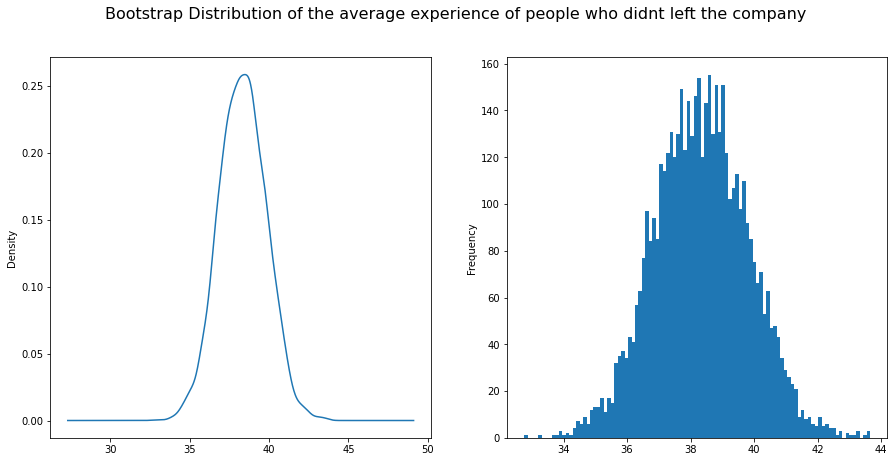

In [26]:
plt.figure(figsize=(15,7))
plt.suptitle("Bootstrap Distribution of the average experience of people who didnt left the company", size=16)

plt.subplot(121)
bootstrap_experiance_no_turnover.plot(kind="kde")
plt.subplot(122)
bootstrap_experiance_no_turnover.plot(kind="hist",bins=100)


**Bootstrap Distributions:**

In [27]:
print("Average Experience: Turnover vs. no Turnover:")
print("Turnover:",bootstrap_experiance_turnover.mean())
print("No turnover:",bootstrap_experiance_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_experiance_turnover,0.025)
upper_turnover = np.quantile(bootstrap_experiance_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_experiance_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_experiance_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")



Average Experience: Turnover vs. no Turnover:
Turnover: 35.08821076009347
No turnover: 38.34034446068046
Confidence Interval No turnover , 95%: [35.487305925381385,41.21423485393148]
Confidence Interval Turnover , 95%: [32.3605734826521,37.911554707758306]


#### T-Test

In [28]:
t_stat, p_value = ttest(bootstrap_experiance_turnover,bootstrap_experiance_no_turnover,"less")
p_value

0.0

In [29]:
print(f"p-value = {p_value} < 0.05")

p-value = 0.0 < 0.05


- **Reject the H0** =>   The average experience of people who left the company **(turnover)** is **less than** the average experience of those who stayed **(no turnover)**.

## Turnover vs Gender

**Gender distribution:**

<AxesSubplot:ylabel='count'>

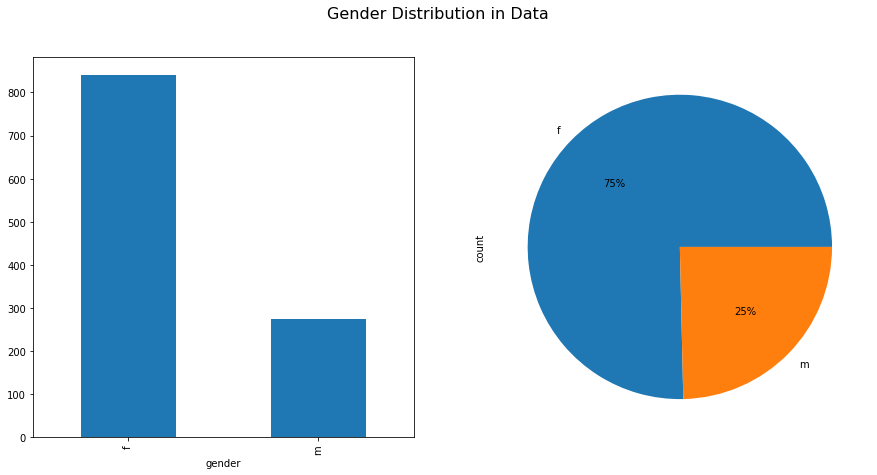

In [30]:
plt.figure(figsize=(15,7))
plt.suptitle("Gender Distribution in Data",size=16)
plt.subplot(1,2,1)
data["gender"].value_counts().plot(kind="bar")
plt.subplot(1,2,2)
data["gender"].value_counts().plot(kind="pie",autopct='%1.0f%%')


In [31]:
gender_n = data["gender"].value_counts()
gender_p = data["gender"].value_counts(normalize=True)

print("Gender distribution")
print(f"Number of males: {gender_n.m}, percentage= {np.round(gender_p.m,2)}%")
print(f"Number of males: {gender_n.f}, percentage= {np.round(gender_p.f,2)}%")

Gender distribution
Number of males: 275, percentage= 0.25%
Number of males: 841, percentage= 0.75%


**Turnover Analysis by Gender:**

<AxesSubplot:xlabel='gender'>

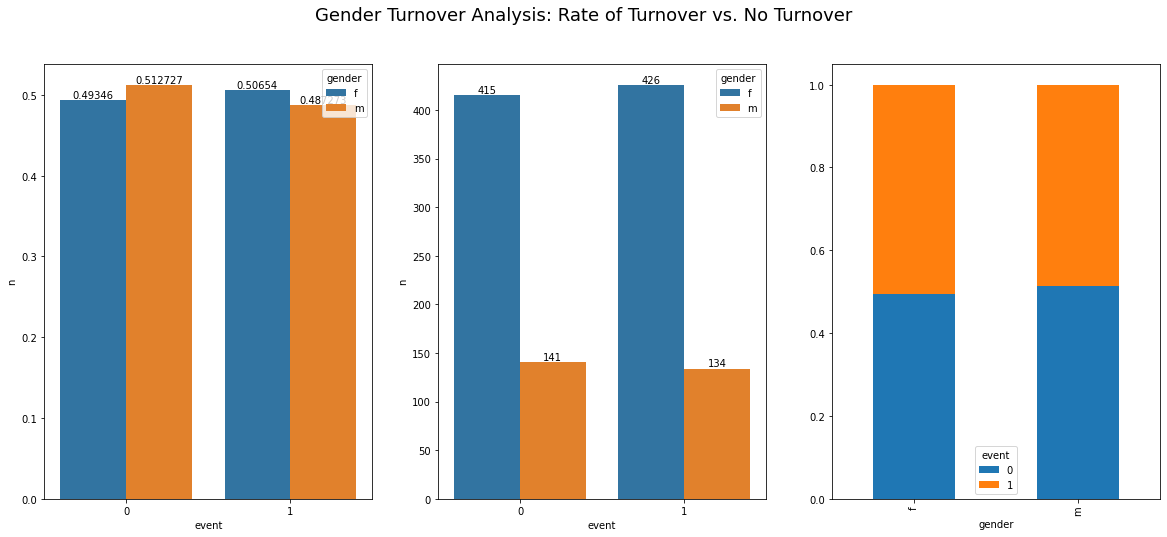

In [32]:
turnover_vs_gender_perc = data.groupby("gender")["event"].value_counts(normalize=True).reset_index(name="n")
turnover_vs_gender_count = data.groupby("gender")["event"].value_counts().reset_index(name="n")

plt.figure(figsize=(20,8))
plt.suptitle("Gender Turnover Analysis: Rate of Turnover vs. No Turnover",size=18)

plt.subplot(1,3,1)
bar1 = sns.barplot(data = turnover_vs_gender_perc, x="event",y="n",hue="gender")
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])


plt.subplot(1,3,2)
bar2 = sns.barplot(data = turnover_vs_gender_count, x="event",y="n",hue="gender")
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])


data.groupby("gender")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked = True,ax=plt.subplot(1,3,3))

**Hypothesis testing 1:**

- H0 : Gender and turnover are independent. In other words, the turnover rate does not depend on gender.
- H1 : Gender and turnover are not independent. In other words, the turnover rate depends on gender.

In [33]:
expected, observed, stats = pingouin.chi2_independence(data[["event","gender"]], x="gender", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.235481,1.0,0.627489,0.014526,0.077385
1,cressie-read,0.666667,0.235482,1.0,0.627488,0.014526,0.077385
2,log-likelihood,0.000000,0.235491,1.0,0.627482,0.014526,0.077386
3,freeman-tukey,-0.500000,0.235504,1.0,0.627472,0.014527,0.077387
4,mod-log-likelihood,-1.000000,0.235521,1.0,0.627460,0.014527,0.077389
5,neyman,-2.000000,0.235571,1.0,0.627423,0.014529,0.077395


- => P-value = 0.62 > 0.05 => Fail to reject H0
- **=>  Gender and turnover are independent. In other words, the turnover rate does not depend on gender.**

**Hypothesis testing 2:** (to be more confident about the previous result)
- H0 : There is no difference between females and males in terms of turnover rates.
- H1 : Females are more likely to turn over than males.

In [34]:
turnover_vs_gender_count

,gender,event,n
0,f,1,426
1,f,0,415
2,m,0,141
3,m,1,134


In [35]:
n_female_success =  turnover_vs_gender_count[(turnover_vs_gender_count["gender"]=="f") & (turnover_vs_gender_count["event"]==1)]["n"]
n_male_success =  turnover_vs_gender_count[(turnover_vs_gender_count["gender"]=="m") & (turnover_vs_gender_count["event"]==1)]["n"]

In [36]:
#get attributes 
n = np.array([turnover_vs_gender_count[turnover_vs_gender_count["gender"] == "f"]["n"].sum(),
                         turnover_vs_gender_count[turnover_vs_gender_count["gender"] == "m"]["n"].sum() ])
succes_counts = np.array([n_female_success[0],n_male_success[3]])

In [37]:
print("succes_counts:",succes_counts)
print("n:",n)

succes_counts: [426 134]
n: [841 275]


In [38]:
z_stat, p_value = proportions_ztest(count= succes_counts , nobs = n , alternative="larger")
print(f"p-value: {p_value}")

p-value: 0.2895397324465482


- => p-value = 0.28 > 0.05 => fails to reject the H0 
- => **There is no difference between females and males in terms of turnover rates.**

## Turnover vs Age

<AxesSubplot:>

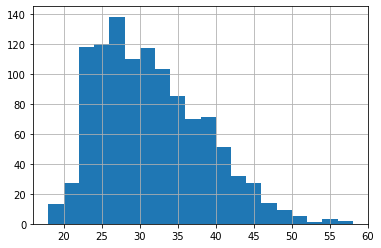

In [39]:
data["age"].hist(bins=20)

<AxesSubplot:xlabel='event', ylabel='age'>

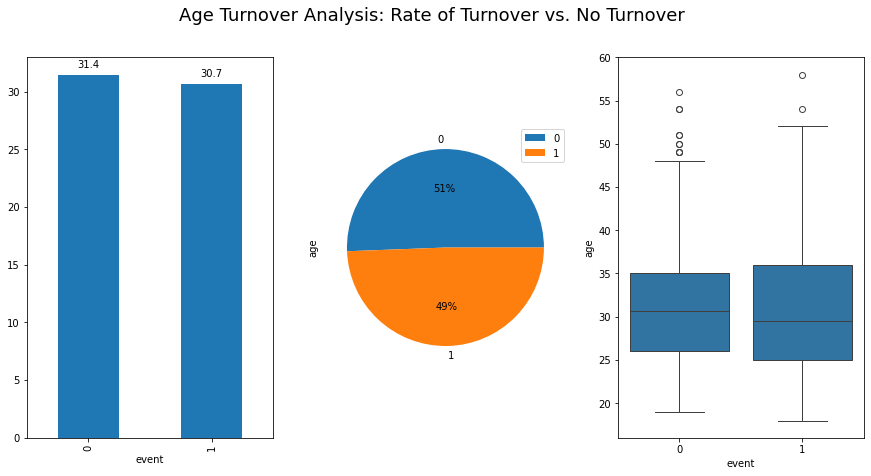

In [40]:
plt.figure(figsize=(15,7))
plt.suptitle("Age Turnover Analysis: Rate of Turnover vs. No Turnover",size=18)


plt.subplot(131)
ax = data.groupby("event")["age"].mean().plot(kind="bar")
for index, value in enumerate(data.groupby("event")["age"].mean()):
    ax.text(index, value + 0.5, f'{value:.1f}', ha='center', va='bottom')
    
    
plt.subplot(132)
data.groupby("event")["age"].mean().plot(kind="pie",autopct='%1.0f%%')
plt.legend()
plt.subplot(133)
sns.boxplot(data=data,x="event",y="age")

In [41]:
print("age range:",(data["age"].min(),data["age"].max()))
print("Average age (mean): ",data["age"].mean())
print("Average age (median): ",data["age"].median())
print("IQR, Turnover: ",np.quantile(data[data["event"] == 1]["age"],0.75) - np.quantile(data[data["event"] == 1]["age"],0.25))
print("IQR, no Turnover: ",np.quantile(data[data["event"] == 0]["age"],0.75) - np.quantile(data[data["event"] == 0]["age"],0.25))
print("--> age spread is almost similar")

age range: (18.0, 58.0)
Average age (mean):  31.02473386481183
Average age (median):  30.0
IQR, Turnover:  11.0
IQR, no Turnover:  9.0
--> age spread is almost similar


<AxesSubplot:title={'center':'Turnover'}, ylabel='Density'>

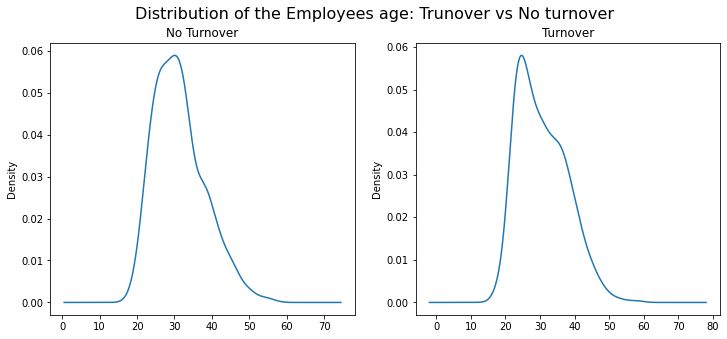

In [42]:
plt.figure(figsize=(12,5))
plt.suptitle("Distribution of the Employees age: Trunover vs No turnover", size=16)

plt.subplot(1,2,1)
plt.title("No Turnover")
data[data["event"] == 0]["age"].plot(kind="kde")

plt.subplot(1,2,2)
plt.title("Turnover")
data[data["event"] == 1]["age"].plot(kind="kde")

**=> we're not certain about the normality of  data => we would perform ttest using our data , and another one using the bootstrap distribution
and another one using non parametric test**

In [43]:
bootstrap_age_no_turnover = create_bootstrap_distribution(data[data["event"] == 0],"age")
bootstrap_age_turnover = create_bootstrap_distribution(data[data["event"] == 1],"age")

<AxesSubplot:ylabel='Frequency'>

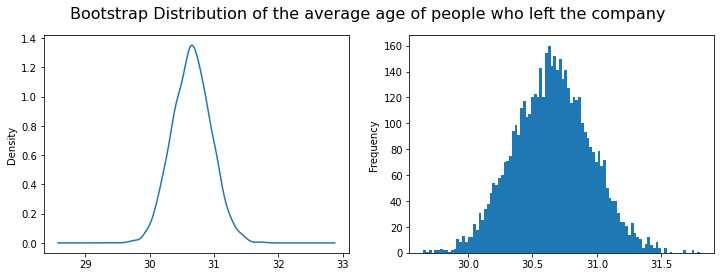

In [44]:
plt.figure(figsize=(12,4))
plt.suptitle("Bootstrap Distribution of the average age of people who left the company", size=16)

plt.subplot(121)
bootstrap_age_turnover.plot(kind="kde")
plt.subplot(122)
bootstrap_age_turnover.plot(kind="hist",bins=100)


<AxesSubplot:ylabel='Frequency'>

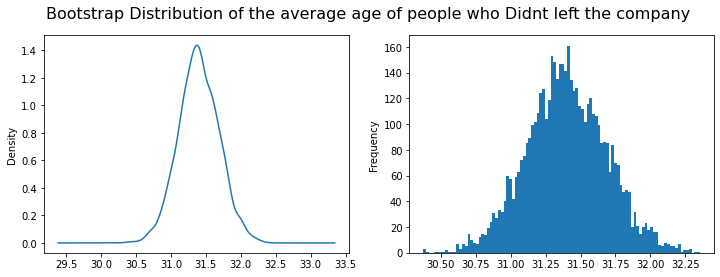

In [45]:
plt.figure(figsize=(12,4))
plt.suptitle("Bootstrap Distribution of the average age of people who Didnt left the company", size=16)

plt.subplot(121)
bootstrap_age_no_turnover.plot(kind="kde")
plt.subplot(122)
bootstrap_age_no_turnover.plot(kind="hist",bins=100)


In [46]:
print("Average Age: Turnover vs. no Turnover:")
print("Turnover:",bootstrap_age_turnover.mean())
print("No turnover:",bootstrap_age_no_turnover.mean())
lower_no_turnover = np.quantile(bootstrap_age_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_age_no_turnover,0.975)
lower_turnover = np.quantile(bootstrap_age_turnover,0.025)
upper_turnover = np.quantile(bootstrap_age_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")



Average Age: Turnover vs. no Turnover:
Turnover: 30.65445527361409
No turnover: 31.39917349486435
Confidence Interval No turnover , 95%: [30.841654765981115,31.979902275431655]
Confidence Interval Turnover , 95%: [30.07856549906875,31.246853054366966]


**Hypothesis testing 1:**
- The average age of employees who are leaving the company is the **same** as the average age of employees who are staying.
- The average age of employees who are staying is greater than the average age of employees who are leaving.

**#using our data**

In [47]:
t_test, p_value = ttest(data[data["event"] == 0]["age"], data[data["event"] == 1]["age"],"greater")
p_value

0.03700070901473107

**#using The bootstrap distribution**


In [48]:
t_test, p_value = ttest(bootstrap_age_no_turnover, bootstrap_age_turnover,"greater")
p_value

0.0

**# Wilcoxon-man-whitney test** (Non-parametric test)

In [49]:
age_vs_turnover = data[["event","age"]]
age_vs_turnover_wide = pd.pivot(data=age_vs_turnover, columns="event",values="age")

In [50]:
age_vs_turnover_wide.sample(5)

event,0,1
90,NaN,28.0
488,NaN,26.0
717,43.0,NaN
615,26.0,NaN
977,29.0,NaN


In [51]:
pingouin.mwu(x=age_vs_turnover_wide[0],y=age_vs_turnover_wide[1], alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,166856.0,two-sided,0.037698,-0.071788,0.535894


**Result:**
- p-value < 0.05 => fail to reject the H0 
- **=> The average age of employees who are staying is greater than the average age of employees who are leaving.**

## Turnover vs Age Category 

**Hypothesis testing 2:** 
- H0 : There is no association between being under 30 and turnover. In other words, age (under 30 or 30 and older) and turnover are independent of each other.
- H1 : There is an association between being under 30 and turnover. In other words, age (under 30 or 30 and older) and turnover are not independent.

In [52]:
#create new column (classify the ages > 30 and <30)
age_category = []
for age in data["age"]:
    if age <= 30:
        age_category.append("under_30")
    else:
        age_category.append("at_least_30")
data["age_cat"] = age_category

<AxesSubplot:xlabel='age_cat'>

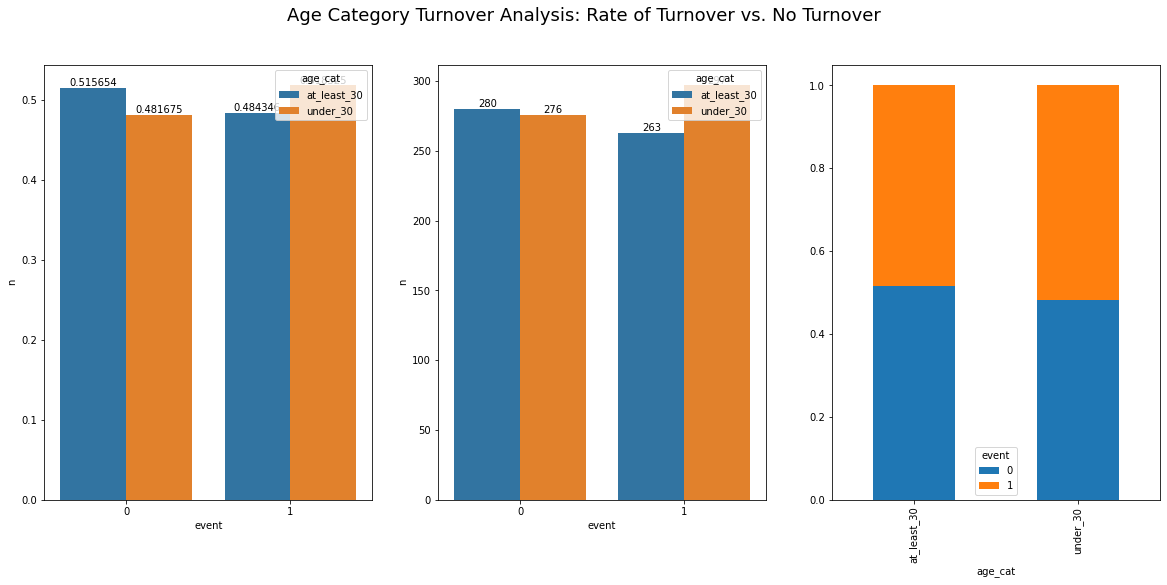

In [53]:
turnover_vs_age_perc = data.groupby("age_cat")["event"].value_counts(normalize=True).reset_index(name="n")
turnover_vs_age_count = data.groupby("age_cat")["event"].value_counts().reset_index(name="n")

plt.figure(figsize=(20,8))
plt.suptitle("Age Category Turnover Analysis: Rate of Turnover vs. No Turnover",size=18)

plt.subplot(1,3,1)
bar1 = sns.barplot(data = turnover_vs_age_perc, x="event",y="n",hue="age_cat")
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])


plt.subplot(1,3,2)
bar2 = sns.barplot(data = turnover_vs_age_count, x="event",y="n",hue="age_cat")
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])


data.groupby("age_cat")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked = True,ax=plt.subplot(1,3,3))

In [54]:
expected, observed, stats = pingouin.chi2_independence(data[["event","age_cat"]], x="age_cat", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.155213,1.0,0.282461,0.032174,0.189240
1,cressie-read,0.666667,1.155256,1.0,0.282452,0.032174,0.189245
2,log-likelihood,0.000000,1.155408,1.0,0.282420,0.032176,0.189264
3,freeman-tukey,-0.500000,1.155581,1.0,0.282384,0.032179,0.189285
4,mod-log-likelihood,-1.000000,1.155804,1.0,0.282338,0.032182,0.189313
5,neyman,-2.000000,1.156399,1.0,0.282214,0.032190,0.189387


- p-value = 0.28 > 0.05 => fail
- **There is no association between being under 30 and turnover. In other words, age (under 30 or 30 and older) and turnover are independent of each other.**

## Turnover vs industry

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

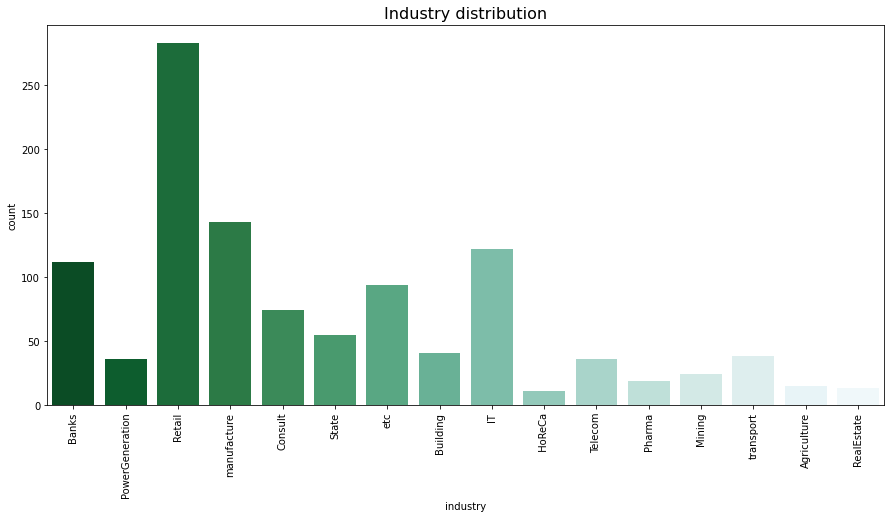

In [55]:
plt.figure(figsize=(15,7))
plt.title("Industry distribution",size=16)
ax = sns.countplot(data =data , x="industry",palette="BuGn_r")

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

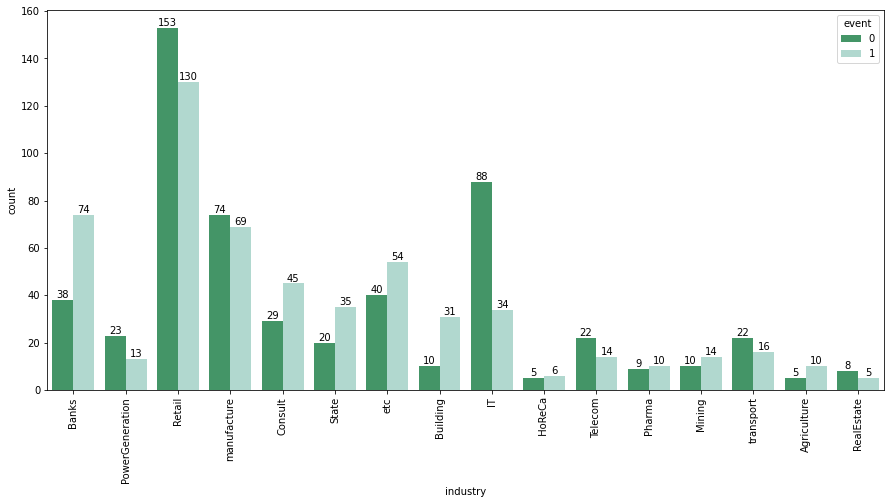

In [56]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data =data , hue="event",x="industry",palette="BuGn_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.xticks(rotation=90)

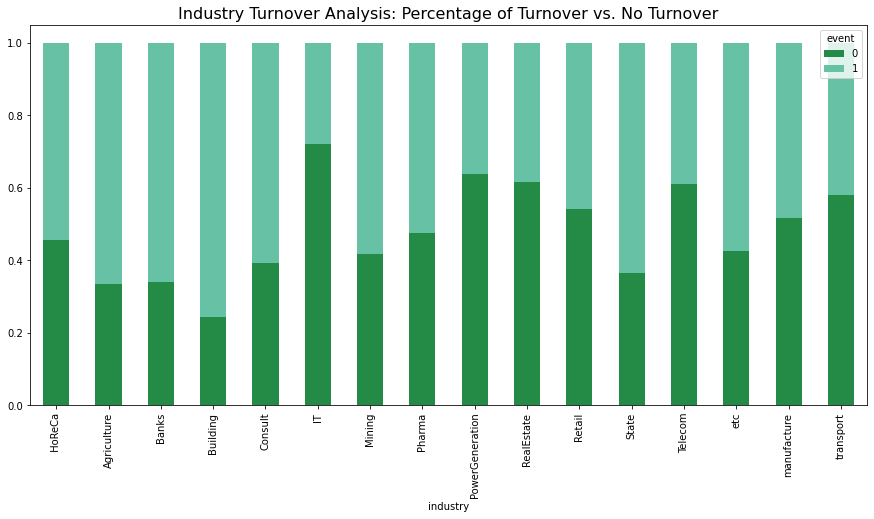

In [57]:
ax = data.groupby("industry")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(15,7),
                                                                             title="Industry Turnover Analysis: Percentage of Turnover vs. No Turnover",
                                                                                  color=sns.color_palette("BuGn_r",n_colors=3))

ax.title.set_size(16)

**Hypothesis testing:**
- The industry in which an employee works does not influence whether they leave the company or stay. Turnover rates are the same across all industries.
- The industry in which an employee works influences whether they leave the company or stay. Turnover rates differ across industries. 

In [58]:
#check for the expected frequency 

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['industry'])
contingency_table

industry,HoReCa,Agriculture,Banks,Building,Consult,IT,Mining,Pharma,PowerGeneration,RealEstate,Retail,State,Telecom,etc,manufacture,transport
event,,,,,,,,,,,,,,,,
0,5,5,38,10,29,88,10,9,23,8,153,20,22,40,74,22
1,6,10,74,31,45,34,14,10,13,5,130,35,14,54,69,16


In [60]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[  5.48028674   7.47311828  55.79928315  20.4265233   36.86738351
   60.78136201  11.95698925   9.46594982  17.93548387   6.47670251
  140.99283154  27.40143369  17.93548387  46.83154122  71.2437276
   18.93189964]
 [  5.51971326   7.52688172  56.20071685  20.5734767   37.13261649
   61.21863799  12.04301075   9.53405018  18.06451613   6.52329749
  142.00716846  27.59856631  18.06451613  47.16845878  71.7562724
   19.06810036]]


In [61]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [62]:
#all the assumed assumptions are valid. we can now apply the chi2 test 

In [63]:
expected, observed, stats = pingouin.chi2_independence(data[["event","industry"]], x="industry", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,66.567347,15.0,1.812230e-08,0.244230,0.999989
1,cressie-read,0.666667,66.949194,15.0,1.551996e-08,0.244929,0.999990
2,log-likelihood,0.000000,68.338656,15.0,8.814649e-09,0.247458,0.999993
3,freeman-tukey,-0.500000,69.980299,15.0,4.503337e-09,0.250412,0.999996
4,mod-log-likelihood,-1.000000,72.202060,15.0,1.805104e-09,0.254356,0.999998
5,neyman,-2.000000,78.725690,15.0,1.193460e-10,0.265599,1.000000


- P-value < 0.05 => reject the Null hypothesis (H0)
- **-> The industry in which an employee works influences whether they leave the company or stay. Turnover rates differ across industries.**

In [64]:
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,age_cat
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,at_least_30
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,at_least_30
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,at_least_30
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,at_least_30
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,at_least_30


## Turnover vs Profession

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

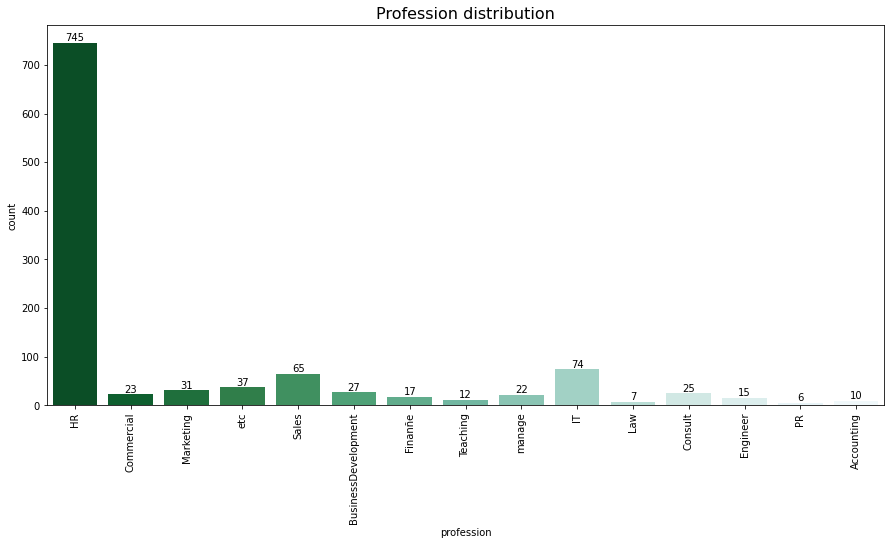

In [65]:
plt.figure(figsize=(15,7))
plt.title("Profession distribution",size=16)
ax = sns.countplot(data =data , x="profession",palette="BuGn_r")
for i in range(data["profession"].nunique()):
    ax.bar_label(ax.containers[i])


plt.xticks(rotation=90)

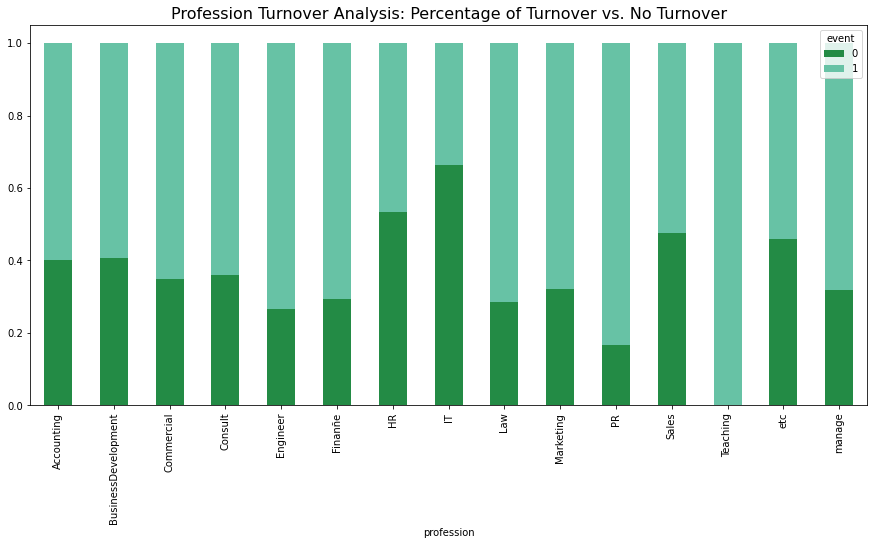

In [66]:
ax = data.groupby("profession")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(15,7),
                                                                             title="Profession Turnover Analysis: Percentage of Turnover vs. No Turnover",
                                                                                  color=sns.color_palette("BuGn_r",n_colors=3))

ax.title.set_size(16)

- we observe that Teachers are 100% going to leave the company

**Hypothesis Testing:**
- There is no relationship between an employee's profession and their likelihood of turnover. The probability of turnover is the same regardless of profession.
- There is a relationship between an employee's profession and their likelihood of turnover. The probability of turnover differs depending on the employee's profession.

In [67]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['profession'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[  4.98207885  13.4516129   11.45878136  12.45519713   7.47311828
    8.46953405 371.16487455  36.86738351   3.4874552   15.44444444
    2.98924731  32.38351254   5.97849462  18.43369176  10.96057348]
 [  5.01792115  13.5483871   11.54121864  12.54480287   7.52688172
    8.53046595 373.83512545  37.13261649   3.5125448   15.55555556
    3.01075269  32.61648746   6.02150538  18.56630824  11.03942652]]


In [68]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [69]:
#chi2 independence test 

expected, observed, stats = pingouin.chi2_independence(data[["event","profession"]], x="profession", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,45.973095,14.0,0.000028,0.202964,0.998844
1,cressie-read,0.666667,46.853374,14.0,0.000020,0.204898,0.999052
2,log-likelihood,0.000000,51.481198,14.0,0.000003,0.214779,0.999673
3,freeman-tukey,-0.500000,NaN,14.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,14.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,14.0,NaN,NaN,NaN


- **p-value < 0.05 => reject the null hypothesis**
- There is a relationship between an employee's profession and their likelihood of turnover. The probability of turnover differs depending on the employee's profession.

## Turnover vs traffic

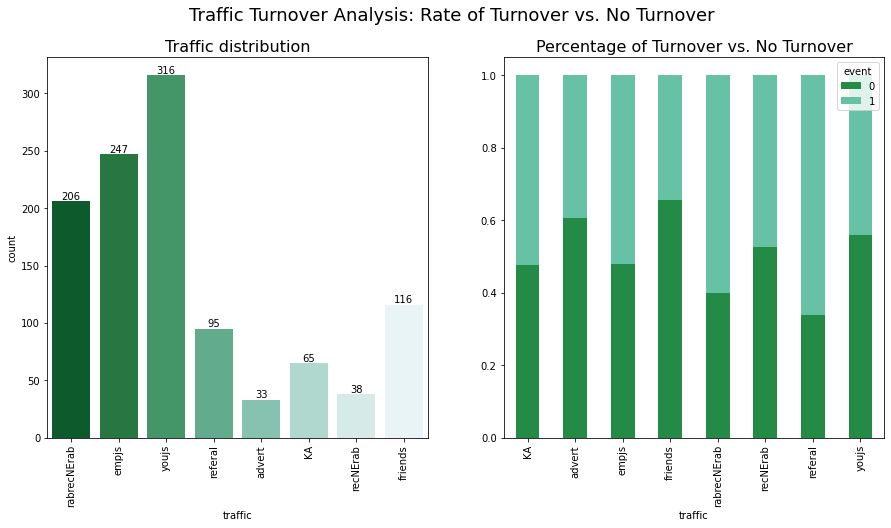

In [70]:
plt.figure(figsize=(20,5))
plt.suptitle("Traffic Turnover Analysis: Rate of Turnover vs. No Turnover",size=18)

plt.subplot(1,2,1)
plt.title("Traffic distribution",size=16)
ax = sns.countplot(data =data , x="traffic",palette="BuGn_r")
for i in range(data["traffic"].nunique()):
    ax.bar_label(ax.containers[i])
plt.xticks(rotation=90)

#plt.subplot(1,2,2)
ax = data.groupby("traffic")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(15,7),
                                                                             title="Percentage of Turnover vs. No Turnover",
                                                                                  color=sns.color_palette("BuGn_r",n_colors=3),
                                                                                    ax= plt.subplot(1,2,2))

ax.title.set_size(16)

**Hypothesis testing:**
- H0 : The source of recruitment (traffic) through which an employee joined the company does not influence their likelihood of leaving the company. Turnover rates are the **same** regardless of the recruitment source.
- H1 : The source of recruitment (traffic) through which an employee joined the company influences their likelihood of leaving the company. Turnover rates **differ** depending on the recruitment source.

In [71]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['traffic'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[ 32.38351254  16.44086022 123.05734767  57.7921147  102.63082437
   18.93189964  47.3297491  157.43369176]
 [ 32.61648746  16.55913978 123.94265233  58.2078853  103.36917563
   19.06810036  47.6702509  158.56630824]]


In [72]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [73]:
#chi2 independence test 

expected, observed, stats = pingouin.chi2_independence(data[["event","traffic"]], x="traffic", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,36.625516,7.0,0.000006,0.181159,0.998310
1,cressie-read,0.666667,36.725790,7.0,0.000005,0.181407,0.998352
2,log-likelihood,0.000000,37.082329,7.0,0.000005,0.182285,0.998493
3,freeman-tukey,-0.500000,37.491912,7.0,0.000004,0.183289,0.998641
4,mod-log-likelihood,-1.000000,38.030257,7.0,0.000003,0.184600,0.998815
5,neyman,-2.000000,39.525939,7.0,0.000002,0.188195,0.999192


- **p-value < 0.05 => reject H0**
-> The source of recruitment (traffic) through which an employee joined the company influences their likelihood of leaving the company. Turnover rates differ depending on the recruitment source.

## Turnover vs Coach

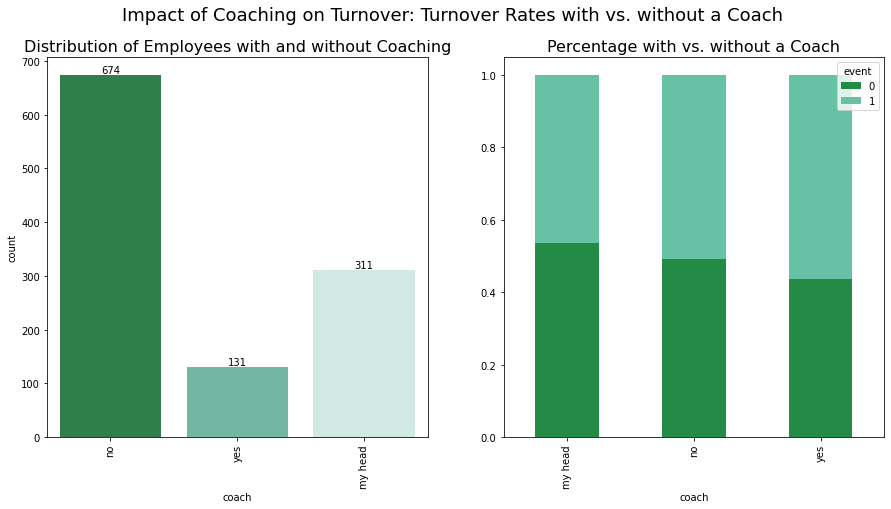

In [74]:
plt.figure(figsize=(20,5))
plt.suptitle("Impact of Coaching on Turnover: Turnover Rates with vs. without a Coach",size=18)

plt.subplot(1,2,1)
plt.title("Distribution of Employees with and without Coaching",size=16)
ax = sns.countplot(data =data , x="coach",palette="BuGn_r")
for i in range(data["coach"].nunique()):
    ax.bar_label(ax.containers[i])
plt.xticks(rotation=90)

#plt.subplot(1,2,2)
ax = data.groupby("coach")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(15,7),
                                                                             title="Percentage with vs. without a Coach",
                                                                                  color=sns.color_palette("BuGn_r",n_colors=3),
                                                                                    ax= plt.subplot(1,2,2))

ax.title.set_size(16)

**Hypothesis test:**
- H0 : The presence of a coach during probation does not influence an employee's likelihood of leaving the company. Turnover rates are **the same** whether or not an employee had a coach.
- H1 : The presence of a coach during probation influences an employee's likelihood of leaving the company. Turnover rates **differ** depending on whether an employee had a coach.

In [75]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['coach'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[154.94265233 335.7921147   65.26523297]
 [156.05734767 338.2078853   65.73476703]]


In [76]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [77]:
#chi2 independence test 

expected, observed, stats = pingouin.chi2_independence(data[["event","coach"]], x="coach", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4.041154,2.0,0.132579,0.060176,0.419189
1,cressie-read,0.666667,4.042903,2.0,0.132463,0.060189,0.419349
2,log-likelihood,0.000000,4.048896,2.0,0.132067,0.060233,0.419896
3,freeman-tukey,-0.500000,4.055588,2.0,0.131626,0.060283,0.420507
4,mod-log-likelihood,-1.000000,4.064180,2.0,0.131061,0.060347,0.421290
5,neyman,-2.000000,4.087134,2.0,0.129566,0.060517,0.423381


- **P-value = 0.13 > 0.05 -> fails to reject H0** 
-> The presence of a coach during probation does not influence an employee's likelihood of leaving the company. Turnover rates are the **same** whether or not an employee had a coach.

## Turnover vs Head (supervisor) Gender

<AxesSubplot:ylabel='count'>

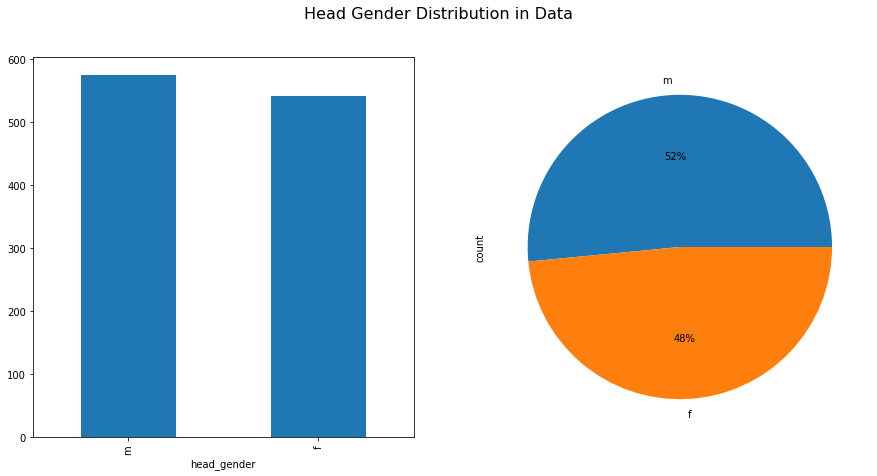

In [78]:
plt.figure(figsize=(15,7))
plt.suptitle("Head Gender Distribution in Data",size=16)
plt.subplot(1,2,1)
data["head_gender"].value_counts().plot(kind="bar")
plt.subplot(1,2,2)
data["head_gender"].value_counts().plot(kind="pie",autopct='%1.0f%%')


In [79]:
gender_n = data["head_gender"].value_counts()
gender_p = data["head_gender"].value_counts(normalize=True)

print("Head Gender distribution")
print(f"Number of males: {gender_n.m}, percentage= {np.round(gender_p.m,2)}%")
print(f"Number of males: {gender_n.f}, percentage= {np.round(gender_p.f,2)}%")

Head Gender distribution
Number of males: 575, percentage= 0.52%
Number of males: 541, percentage= 0.48%


<AxesSubplot:xlabel='head_gender'>

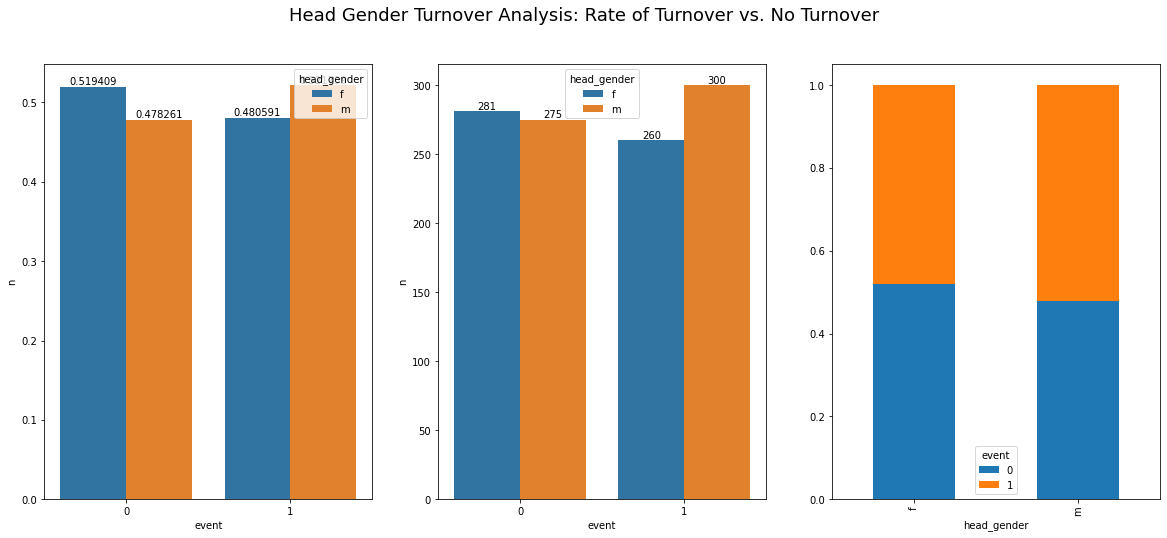

In [80]:
turnover_vs_hgender_perc = data.groupby("head_gender")["event"].value_counts(normalize=True).reset_index(name="n")
turnover_vs_hgender_count = data.groupby("head_gender")["event"].value_counts().reset_index(name="n")

plt.figure(figsize=(20,8))
plt.suptitle("Head Gender Turnover Analysis: Rate of Turnover vs. No Turnover",size=18)

plt.subplot(1,3,1)
bar1 = sns.barplot(data = turnover_vs_hgender_perc, x="event",y="n",hue="head_gender")
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])


plt.subplot(1,3,2)
bar2 = sns.barplot(data = turnover_vs_hgender_count, x="event",y="n",hue="head_gender")
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])


data.groupby("head_gender")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked = True,ax=plt.subplot(1,3,3))

**Hypothesis testing 1:**

- H0 : Supervisor Gender and turnover are independent. In other words, the turnover rate does not depend on supervisor gender.
- H1 : Supervisor Gender and turnover are not independent. In other words, the turnover rate depends on supervisor gender.

In [81]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['head_gender'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[269.53046595 286.46953405]
 [271.46953405 288.53046595]]


In [82]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [83]:
expected, observed, stats = pingouin.chi2_independence(data[["event","head_gender"]], x="head_gender", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.726796,1.0,0.188821,0.039336,0.259706
1,cressie-read,0.666667,1.726892,1.0,0.188808,0.039337,0.259718
2,log-likelihood,0.000000,1.727233,1.0,0.188765,0.039341,0.259760
3,freeman-tukey,-0.500000,1.727620,1.0,0.188715,0.039345,0.259807
4,mod-log-likelihood,-1.000000,1.728118,1.0,0.188651,0.039351,0.259868
5,neyman,-2.000000,1.729452,1.0,0.188481,0.039366,0.260031


**Result hypothesis1** 
- p-value > 0.05 fails to reject the H0
-> Supervisor Gender and turnover are **independent**. In other words, the turnover rate **does not depend** on supervisor gender.

**Hypothesis testing 2: (to be more confident about the previous result)**

- H0 :There is no difference in turnover rates based on the gender of the supervisor. Employees are equally likely to leave the company regardless of whether their supervisor is male or female.

- H1 Employees are less likely to turn over if their supervisor is female than if their supervisor is male.

In [84]:
n_female_success =  turnover_vs_hgender_count[(turnover_vs_hgender_count["head_gender"]=="f") & (turnover_vs_hgender_count["event"]==1)]["n"]
n_male_success =  turnover_vs_hgender_count[(turnover_vs_hgender_count["head_gender"]=="m") & (turnover_vs_hgender_count["event"]==1)]["n"]

In [85]:
turnover_vs_hgender_count

,head_gender,event,n
0,f,0,281
1,f,1,260
2,m,1,300
3,m,0,275


In [86]:
#get attributes 
n = np.array([turnover_vs_hgender_count[turnover_vs_hgender_count["head_gender"] == "f"]["n"].sum(),
                         turnover_vs_hgender_count[turnover_vs_hgender_count["head_gender"] == "m"]["n"].sum() ])
succes_counts = np.array([n_female_success[1],n_male_success[2]])

In [87]:
print("succes_counts:",succes_counts)
print("n:",n)

succes_counts: [260 300]
n: [541 575]


In [88]:
z_stat, p_value = proportions_ztest(count= succes_counts , nobs = n , alternative="smaller")
print(f"p-value: {p_value}")

p-value: 0.08472507938093443


**Result hypothesis 2** 
- p-value > 0.05 fails to reject the H0
-> There is no difference in turnover rates based on the gender of the supervisor. Employees are equally likely to leave the company regardless of whether their supervisor is male or female. 

## Supervisor Gender vs Employee Gender

In [89]:
supervisor_vs_employee_perc = data.groupby("gender")["head_gender"].value_counts(normalize=True).reset_index(name="n")
supervisor_vs_employee_count = data.groupby("gender")["head_gender"].value_counts().reset_index(name="n")


In [90]:
supervisor_vs_employee_count["head_gender"] = supervisor_vs_employee_count["head_gender"].apply(lambda x: x + "_supervisor")
supervisor_vs_employee_count["gender"] = supervisor_vs_employee_count["gender"].apply(lambda x: x + "_employee")

supervisor_vs_employee_perc["head_gender"] = supervisor_vs_employee_perc["head_gender"].apply(lambda x: x + "_supervisor")
supervisor_vs_employee_perc["gender"] = supervisor_vs_employee_perc["gender"].apply(lambda x: x + "_employee")

<AxesSubplot:>

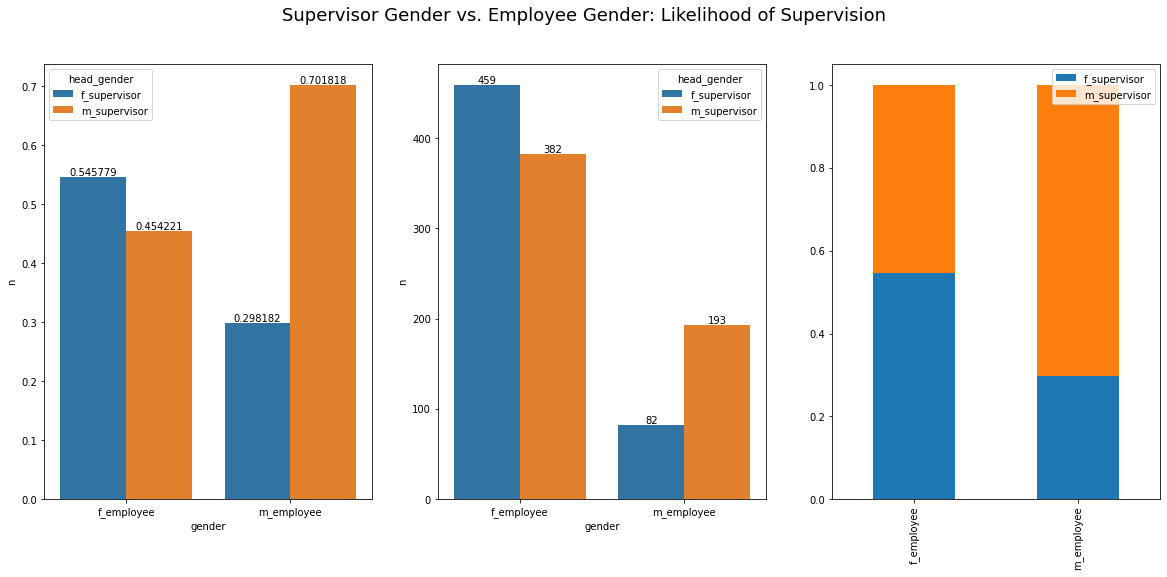

In [91]:

plt.figure(figsize=(20,8))
plt.suptitle("Supervisor Gender vs. Employee Gender: Likelihood of Supervision",size=18)

plt.subplot(1,3,1)
bar1 = sns.barplot(data = supervisor_vs_employee_perc, x="gender",y="n",hue="head_gender")
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])


plt.subplot(1,3,2)
bar2 = sns.barplot(data = supervisor_vs_employee_count, x="gender",y="n",hue="head_gender")
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])

viz = data.groupby("gender")["head_gender"].value_counts(normalize=True).unstack()
viz.columns = ["f_supervisor","m_supervisor"]
viz.index = ["f_employee","m_employee"]

viz.plot(kind="bar",stacked = True,ax=plt.subplot(1,3,3))

**Hypothesis testing 1:**
- H0 : The gender of the supervisor is **independent** of the gender of the employee. In other words, **there is no association between the gender of the supervisor and the gender of the employee.**
- H1 : The gender of the supervisor is associated with the gender of the employee. Specifically, **male employees are more likely to be supervised by male supervisors.**

In [92]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['head_gender'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[407.6890681 433.3109319]
 [133.3109319 141.6890681]]


In [93]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [94]:
expected, observed, stats = pingouin.chi2_independence(data[["gender","head_gender"]], x="head_gender", y="gender")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,49.878468,1.0,1.635699e-12,0.211409,1.0
1,cressie-read,0.666667,50.171731,1.0,1.408625e-12,0.212030,1.0
2,log-likelihood,0.000000,51.096973,1.0,8.791374e-13,0.213976,1.0
3,freeman-tukey,-0.500000,52.110063,1.0,5.247533e-13,0.216087,1.0
4,mod-log-likelihood,-1.000000,53.424111,1.0,2.687777e-13,0.218795,1.0
5,neyman,-2.000000,57.086180,1.0,4.171266e-14,0.226169,1.0


**Result hypothesis test 1 :**
- **P-value < 0.05 => reject H0** 
-> The gender of the supervisor **is associated** with the gender of the employee. Specifically, male employees are more likely to be supervised by male supervisors.

**Hypothesis testing 2:** (to be more confident about the previous result)
- H0 : The proportion of male employees supervised by male supervisors **is equal** to the proportion of female employees supervised by female supervisors. There is no association between the gender of the supervisor and the gender of the employee. 
- H1 : The proportion of male employees supervised by male supervisors **is greater than** the proportion of female employees supervised by female supervisors. Specifically, **male employees are more likely to be supervised by male supervisors.**

In [95]:
n_female_success =  supervisor_vs_employee_count[(supervisor_vs_employee_count["gender"]=="f_employee") & (supervisor_vs_employee_count["head_gender"]=="m_supervisor")]["n"]
n_male_success =  supervisor_vs_employee_count[(supervisor_vs_employee_count["gender"]=="m_employee") & (supervisor_vs_employee_count["head_gender"]=="m_supervisor")]["n"]

In [96]:
supervisor_vs_employee_count 

,gender,head_gender,n
0,f_employee,f_supervisor,459
1,f_employee,m_supervisor,382
2,m_employee,m_supervisor,193
3,m_employee,f_supervisor,82


In [97]:
#get attributes 
n = np.array([supervisor_vs_employee_count[supervisor_vs_employee_count["gender"] == "m_employee"]["n"].sum(),
                         supervisor_vs_employee_count[supervisor_vs_employee_count["gender"] == "f_employee"]["n"].sum() ])
succes_counts = np.array([n_male_success[2],n_female_success[1]])

In [98]:
print("succes_counts:",succes_counts)
print("n:",n) 

succes_counts: [193 382]
n: [275 841]


In [99]:
z_stat, p_value = proportions_ztest(count= succes_counts , nobs = n , alternative="larger")
print(f"p-value: {p_value}")

p-value: 4.947248032370556e-13


**Result Hypothesis testing 2:**
- **P-value < 0.05 -> Reject H0** 
- H1 : The proportion of male employees supervised by male supervisors is greater than the proportion of female employees supervised by female supervisors. Specifically, **male employees are more likely to be supervised by male supervisors.**

## Turnover vs greywage

<AxesSubplot:ylabel='count'>

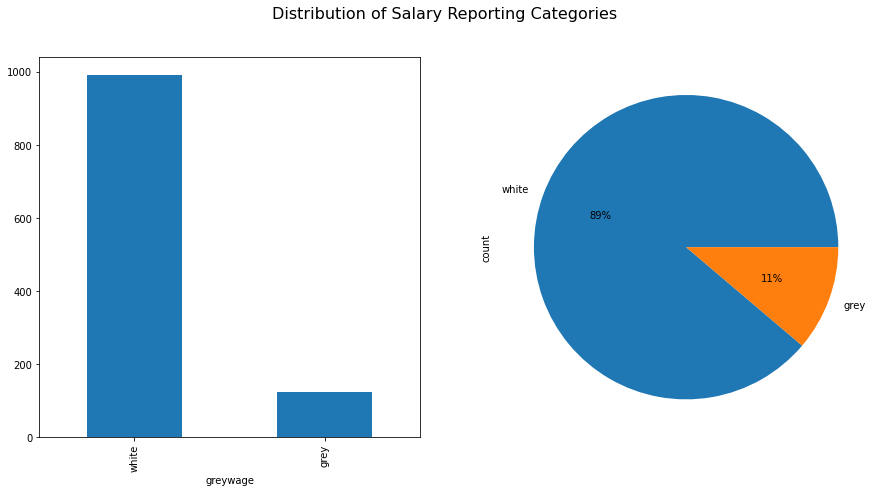

In [100]:
plt.figure(figsize=(15,7))
plt.suptitle("Distribution of Salary Reporting Categories",size=16)
plt.subplot(1,2,1)
data["greywage"].value_counts().plot(kind="bar")
plt.subplot(1,2,2)
data["greywage"].value_counts().plot(kind="pie",autopct='%1.0f%%')


In [101]:
greywage_n = data["greywage"].value_counts()
greywage_p = data["greywage"].value_counts(normalize=True)

print("Distribution of Salary Reporting Categories")
print(f"White: {greywage_n.white} employees, percentage= {np.round(greywage_p.white,2)}%")
print(f"Grey: {greywage_n.grey} employees, percentage= {np.round(greywage_p.grey,2)}%")

Distribution of Salary Reporting Categories
White: 991 employees, percentage= 0.89%
Grey: 125 employees, percentage= 0.11%


<AxesSubplot:xlabel='greywage'>

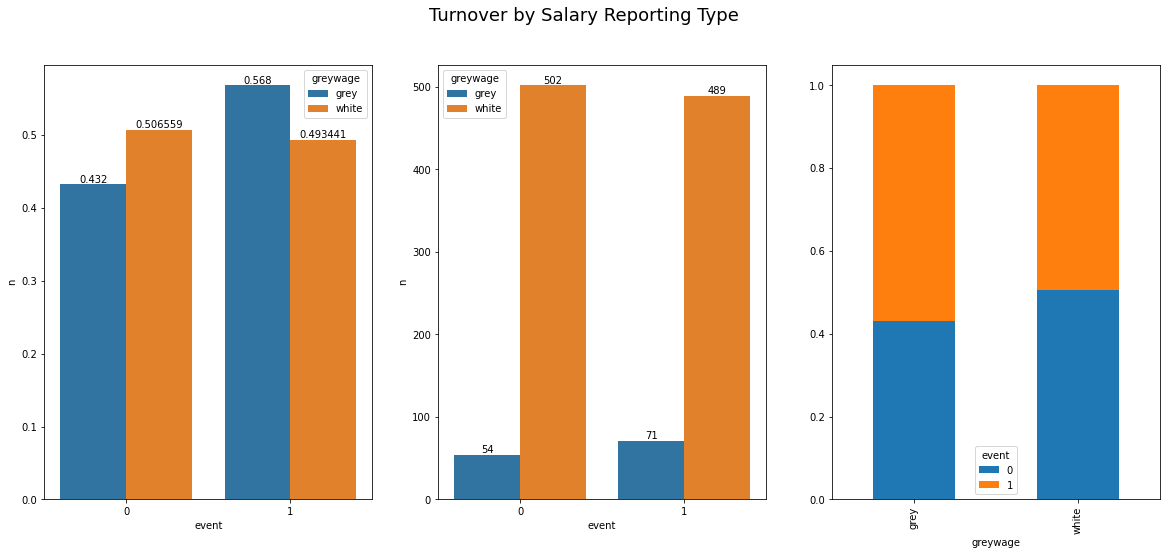

In [102]:
turnover_vs_greywage_perc = data.groupby("greywage")["event"].value_counts(normalize=True).reset_index(name="n")
turnover_vs_greywage_count = data.groupby("greywage")["event"].value_counts().reset_index(name="n")

plt.figure(figsize=(20,8))
plt.suptitle("Turnover by Salary Reporting Type",size=18)

plt.subplot(1,3,1)
bar1 = sns.barplot(data = turnover_vs_greywage_perc, x="event",y="n",hue="greywage")
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])


plt.subplot(1,3,2)
bar2 = sns.barplot(data = turnover_vs_greywage_count, x="event",y="n",hue="greywage")
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])


data.groupby("greywage")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked = True,ax=plt.subplot(1,3,3))

**Hypothesis testing:**
- H0 : Salary reporting type and Turnover are **independent**. the turnover rate does not depend on the Salary reporting type
- H1 : The turnover rate **depends on** the Salary reporting type 

In [103]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['greywage'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[ 62.27598566 493.72401434]
 [ 62.72401434 497.27598566]]


In [104]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [105]:
expected, observed, stats = pingouin.chi2_independence(data[["event","greywage"]], x="greywage", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,2.178999,1.0,0.139905,0.044187,0.314552
1,cressie-read,0.666667,2.180305,1.0,0.139787,0.044200,0.314708
2,log-likelihood,0.000000,2.184604,1.0,0.139397,0.044244,0.315223
3,freeman-tukey,-0.500000,2.189316,1.0,0.138971,0.044292,0.315788
4,mod-log-likelihood,-1.000000,2.195316,1.0,0.138431,0.044352,0.316506
5,neyman,-2.000000,2.211236,1.0,0.137009,0.044513,0.318411


**Result:**
- **P-value > 0.05 => fails to reject the H0** 
-> Salary reporting type and Turnover are independent. the turnover rate does not depend from the Salary reporting type

## Turnover vs way of transportation

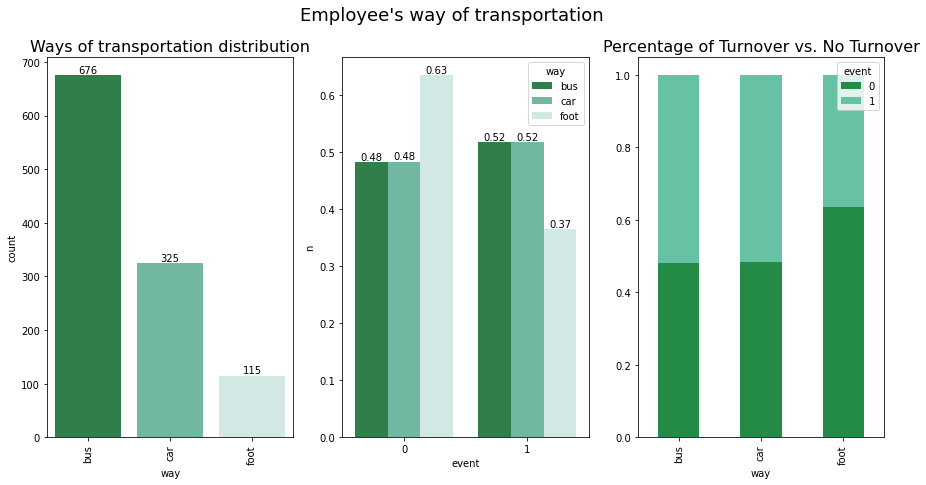

In [106]:
plt.figure(figsize=(30,5))
plt.suptitle("Employee's way of transportation",size=18)

plt.subplot(1,3,1)
plt.title("Ways of transportation distribution",size=16)
ax = sns.countplot(data =data , x="way",palette="BuGn_r")
for i in range(data["way"].nunique()):
    ax.bar_label(ax.containers[i])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
turnover_vs_way_perc = data.groupby("way")["event"].value_counts(normalize=True).reset_index(name="n")
bar1 = sns.barplot(data = turnover_vs_way_perc, x="event",y="n",hue="way",palette="BuGn_r")
bar1.bar_label(bar1.containers[0],fmt='%.2f')
bar1.bar_label(bar1.containers[1],fmt='%.2f')
bar1.bar_label(bar1.containers[2],fmt='%.2f')



#plt.subplot(1,2,2)
ax = data.groupby("way")["event"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(15,7),
                                                                             title="Percentage of Turnover vs. No Turnover",
                                                                                  color=sns.color_palette("BuGn_r",n_colors=3),
                                                                                    ax= plt.subplot(1,3,3))

ax.title.set_size(16)

**Hypothesis testing:**
- H0 : The turnover rate **does not depend on** the employee's way of transportation.  
- H1 : the turnover rate **depends on** the employee's way of transportation **(employees who are leaving nearby are more likely to stay)**

In [107]:
#check for the expected frequency 

# Create a contingency table
contingency_table = pd.crosstab(data['event'], data['way'])

#perform chi2_contingency test 
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
# Print expected frequencies
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[336.78853047 161.91756272  57.29390681]
 [339.21146953 163.08243728  57.70609319]]


In [108]:
# Check for any expected frequencies < 1 or too many < 5
if any(expected.flatten() < 1):
    print("Warning: Some expected frequencies are less than 1.")
if np.sum(expected < 5) > 0.2 * expected.size:
    print("Warning: More than 20% of cells have expected frequencies less than 5.")

In [109]:
#chi2 independence test 

expected, observed, stats = pingouin.chi2_independence(data[["event","traffic"]], x="traffic", y="event")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,36.625516,7.0,0.000006,0.181159,0.998310
1,cressie-read,0.666667,36.725790,7.0,0.000005,0.181407,0.998352
2,log-likelihood,0.000000,37.082329,7.0,0.000005,0.182285,0.998493
3,freeman-tukey,-0.500000,37.491912,7.0,0.000004,0.183289,0.998641
4,mod-log-likelihood,-1.000000,38.030257,7.0,0.000003,0.184600,0.998815
5,neyman,-2.000000,39.525939,7.0,0.000002,0.188195,0.999192


**Result:**
- P-value < 0.05 => reject H0 
-> the turnover rate **depends on** the employee's way of transportation **(employees who are leaving nearby are more likely to stay)**

## Turnover vs Extraversion

<AxesSubplot:title={'center':'Leaving Employee Extraversion rate Distribution'}, ylabel='Density'>

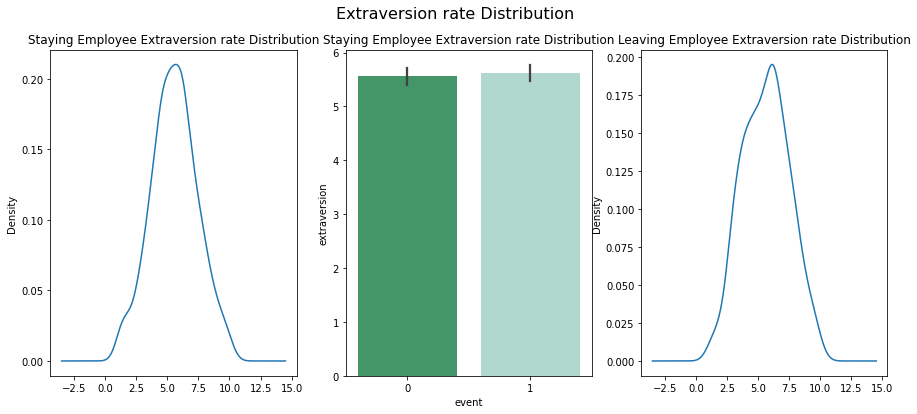

In [110]:
plt.figure(figsize=(15,6))
plt.suptitle("Extraversion rate Distribution",size=16)

plt.subplot(1,3,1)
plt.title("Staying Employee Extraversion rate Distribution")
data[data["event"] == 0]["extraversion"].plot(kind="kde")

plt.subplot(1,3,2)
plt.title("Staying Employee Extraversion rate Distribution")
sns.barplot(data= data, x="event", y="extraversion", palette="BuGn_r")

plt.subplot(1,3,3)
plt.title("Leaving Employee Extraversion rate Distribution")
data[data["event"] == 1]["extraversion"].plot(kind="kde")

> => **our data is normally distributed, all assumptions are valid**

In [111]:
#create bootstrap distribution 
bootstrap_extraversion_turnover = create_bootstrap_distribution(data[data["event"] == 1 ],"extraversion")
bootstrap_extraversion_no_turnover = create_bootstrap_distribution(data[data["event"] == 0 ],"extraversion")

<AxesSubplot:title={'center':'Leaving Empolyee'}>

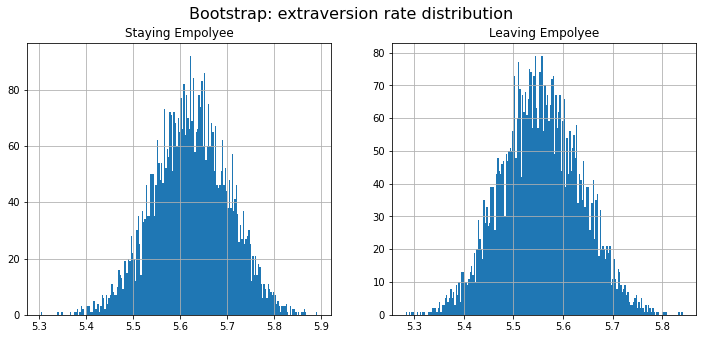

In [112]:
plt.figure(figsize=(12,5))
plt.suptitle("Bootstrap: extraversion rate distribution",size=16)
plt.subplot(1,2,1)
plt.title("Staying Empolyee")
bootstrap_extraversion_turnover.hist(bins=200)
plt.subplot(1,2,2)
plt.title("Leaving Empolyee")
bootstrap_extraversion_no_turnover.hist(bins=200)


In [113]:
print("Average extraversion rate, Turnover:",bootstrap_extraversion_turnover.mean())
print("Average extraversion rate, No Turnover:",bootstrap_extraversion_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_extraversion_turnover,0.025)
upper_turnover = np.quantile(bootstrap_extraversion_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_extraversion_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_extraversion_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")

Average extraversion rate, Turnover: 5.622626000000001
Average extraversion rate, No Turnover: 5.5554378417266195
Confidence Interval No turnover , 95%: [5.4,5.711879496402878]
Confidence Interval Turnover , 95%: [5.4678571428571425,5.773571428571429]


**Hypothesis testing**
- H0 : the average of extraversion rate of the employees who left the company (Turnover) **is the same as** the average extraversion rate of those who are staying (No Turnover) 
- H1 : the average of extraversion rate of the employees who left the company **is different than** the average extraversion rate of those who are staying (No Turnover)

In [114]:
#perform ttest 
t_stat, p_value = ttest(data[data["event"] == 1]["extraversion"],data[data["event"] == 0]["extraversion"],"two-tailed")
p_value

0.5572142121826404

- **P-value > 0.05 => fail to reject the H0**
- > the average of extraversion rate of the employees who left the company (Turnover) **is the same as** the average extraversion rate of those who are staying (No Turnover) 

## Turnover vs Indepnd

<AxesSubplot:title={'center':'Leaving Employee Extraversion rate Distribution'}, ylabel='Density'>

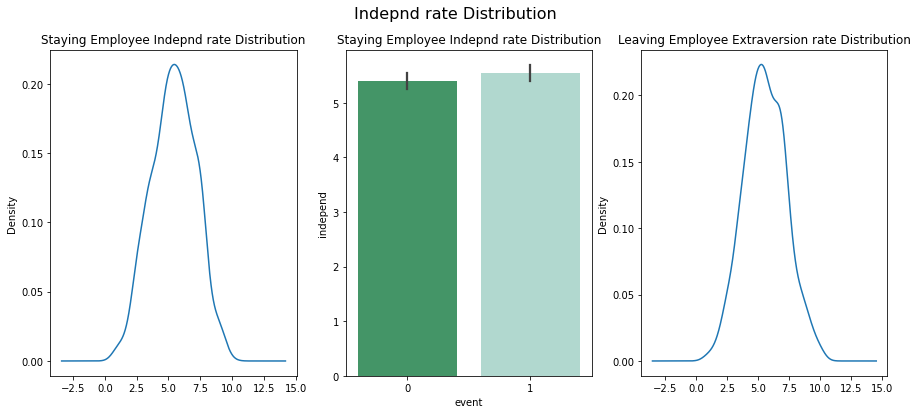

In [115]:
plt.figure(figsize=(15,6))
plt.suptitle("Indepnd rate Distribution",size=16)

plt.subplot(1,3,1)
plt.title("Staying Employee Indepnd rate Distribution")
data[data["event"] == 0]["independ"].plot(kind="kde")

plt.subplot(1,3,2)
plt.title("Staying Employee Indepnd rate Distribution")
sns.barplot(data= data, x="event", y="independ", palette="BuGn_r")

plt.subplot(1,3,3)
plt.title("Leaving Employee Extraversion rate Distribution")
data[data["event"] == 1]["independ"].plot(kind="kde")

In [116]:
#create bootstrap distribution 
bootstrap_independ_turnover = create_bootstrap_distribution(data[data["event"] == 1 ],"independ")
bootstrap_independ_no_turnover = create_bootstrap_distribution(data[data["event"] == 0 ],"independ")

<AxesSubplot:title={'center':'Leaving Empolyee'}>

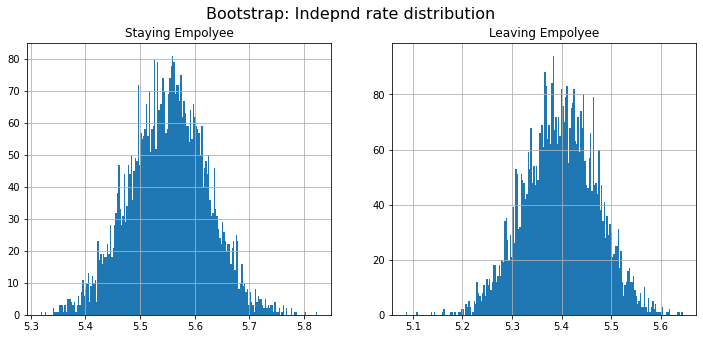

In [117]:
plt.figure(figsize=(12,5))
plt.suptitle("Bootstrap: Indepnd rate distribution",size=16)
plt.subplot(1,2,1)
plt.title("Staying Empolyee")
bootstrap_independ_turnover.hist(bins=200)
plt.subplot(1,2,2)
plt.title("Leaving Empolyee")
bootstrap_independ_no_turnover.hist(bins=200)


In [118]:
print("Average independ rate, Turnover:",bootstrap_independ_turnover.mean())
print("Average independ rate, No Turnover:",bootstrap_independ_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_independ_turnover,0.025)
upper_turnover = np.quantile(bootstrap_independ_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_independ_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_independ_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")

Average independ rate, Turnover: 5.551684214285714
Average independ rate, No Turnover: 5.397648525179856
Confidence Interval No turnover , 95%: [5.253772482014389,5.538489208633094]
Confidence Interval Turnover , 95%: [5.411066964285713,5.687508928571429]


**Hypothesis testing**
- H0 : the average of independ rate of the employees who left the company (Turnover) **is the same as** the average independ rate of those who are staying (No Turnover) 
- H1 : the average of independ rate of the employees who left the company **is different than** the average independ rate of those who are staying (No Turnover)

In [119]:
#perform ttest 
t_stat, p_value = ttest(data[data["event"] == 1]["independ"],data[data["event"] == 0]["independ"],"two-tailed")
p_value

0.12436149357626425

- **P-value > 0.05 => fail to reject the H0**
-> The average of independ rate of the employees who left the company (Turnover) **is the same as** the average independ rate of those who are staying (No Turnover)

## Turnover vs Selfcontrol

<AxesSubplot:title={'center':'Leaving Employee Selfcontrol rate Distribution'}, ylabel='Density'>

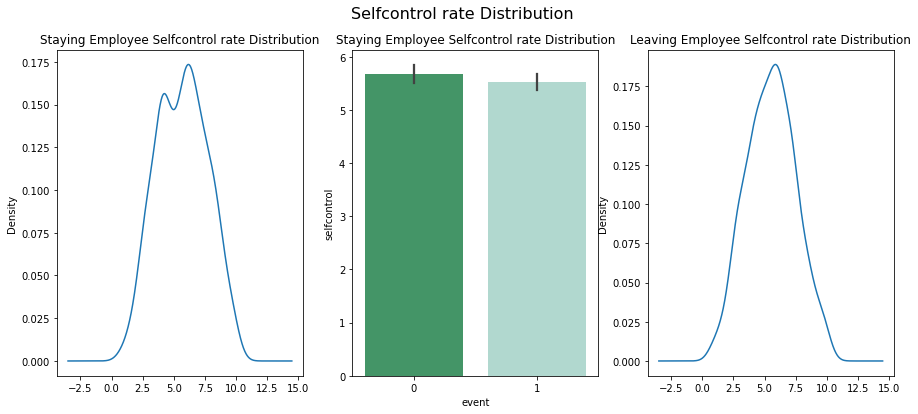

In [120]:
plt.figure(figsize=(15,6))
plt.suptitle("Selfcontrol rate Distribution",size=16)

plt.subplot(1,3,1)
plt.title("Staying Employee Selfcontrol rate Distribution")
data[data["event"] == 0]["selfcontrol"].plot(kind="kde")

plt.subplot(1,3,2)
plt.title("Staying Employee Selfcontrol rate Distribution")
sns.barplot(data= data, x="event", y="selfcontrol", palette="BuGn_r")

plt.subplot(1,3,3)
plt.title("Leaving Employee Selfcontrol rate Distribution")
data[data["event"] == 1]["selfcontrol"].plot(kind="kde")

In [121]:
#create bootstrap distribution 
bootstrap_selfcontrol_turnover = create_bootstrap_distribution(data[data["event"] == 1 ],"selfcontrol")
bootstrap_selfcontrol_no_turnover = create_bootstrap_distribution(data[data["event"] == 0 ],"selfcontrol")

<AxesSubplot:title={'center':'Leaving Empolyee'}>

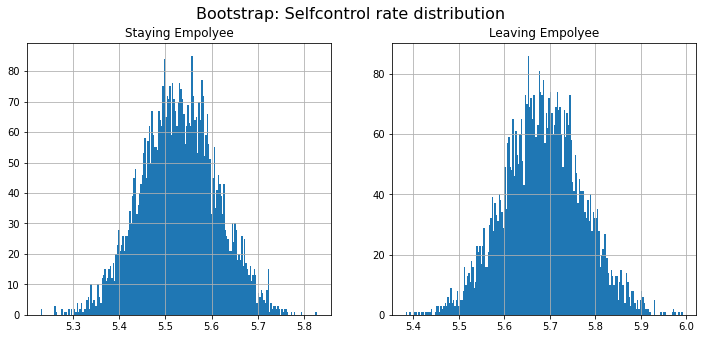

In [122]:
plt.figure(figsize=(12,5))
plt.suptitle("Bootstrap: Selfcontrol rate distribution",size=16)
plt.subplot(1,2,1)
plt.title("Staying Empolyee")
bootstrap_selfcontrol_turnover.hist(bins=200)
plt.subplot(1,2,2)
plt.title("Leaving Empolyee")
bootstrap_selfcontrol_no_turnover.hist(bins=200)


In [123]:
print("Average Selfcontrol rate, Turnover:",bootstrap_selfcontrol_turnover.mean())
print("Average Selfcontrol rate, No Turnover:",bootstrap_selfcontrol_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_selfcontrol_turnover,0.025)
upper_turnover = np.quantile(bootstrap_selfcontrol_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_selfcontrol_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_selfcontrol_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")

Average Selfcontrol rate, Turnover: 5.529354107142858
Average Selfcontrol rate, No Turnover: 5.685760143884892
Confidence Interval No turnover , 95%: [5.516901978417265,5.859730215827338]
Confidence Interval Turnover , 95%: [5.369995535714286,5.690910714285714]


**Hypothesis testing**
- H0 : the average of selfcontrol rate of the employees who left the company (Turnover) **is the same as** the average selfcontrol rate of those who are staying (No Turnover) 
- H1 : the average of selfcontrol rate of the employees who left the company **is different than** the average selfcontrol rate of those who are staying (No Turnover)

In [124]:
#perform ttest 
pingouin.ttest(data[data["event"] == 1]["selfcontrol"],data[data["event"] == 0]["selfcontrol"],"two-tailed")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.31223,1112.116193,two-sided,0.189713,"[-0.39, 0.08]",0.078571,0.157,0.2588


- **P-value > 0.05 => fail to reject the H0**
-> The average of selfcontrol rate of the employees who left the company (Turnover) **is the same as** the average selfcontrol rate of those who are staying (No Turnover)

## Turnover vs Anxiety 

<AxesSubplot:title={'center':'Leaving Employee Anxiety rate Distribution'}, ylabel='Density'>

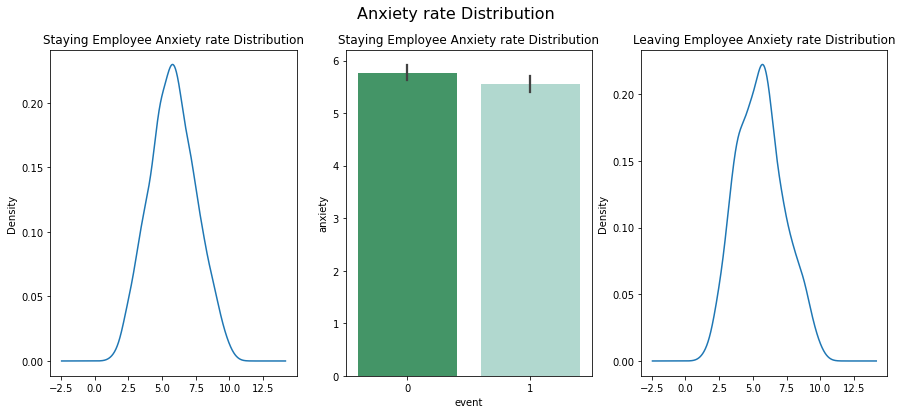

In [125]:
plt.figure(figsize=(15,6))
plt.suptitle("Anxiety rate Distribution",size=16)

plt.subplot(1,3,1)
plt.title("Staying Employee Anxiety rate Distribution")
data[data["event"] == 0]["anxiety"].plot(kind="kde")

plt.subplot(1,3,2)
plt.title("Staying Employee Anxiety rate Distribution")
sns.barplot(data= data, x="event", y="anxiety", palette="BuGn_r")

plt.subplot(1,3,3)
plt.title("Leaving Employee Anxiety rate Distribution")
data[data["event"] == 1]["anxiety"].plot(kind="kde")

In [126]:
#create bootstrap distribution 
bootstrap_anxiety_turnover = create_bootstrap_distribution(data[data["event"] == 1 ],"anxiety")
bootstrap_anxiety_no_turnover = create_bootstrap_distribution(data[data["event"] == 0 ],"anxiety")

<AxesSubplot:title={'center':'Leaving Empolyee'}>

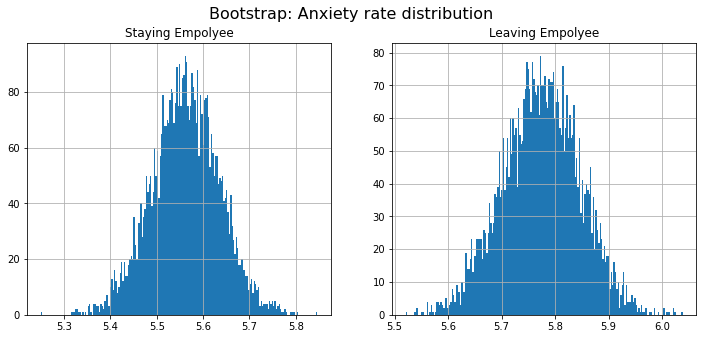

In [127]:
plt.figure(figsize=(12,5))
plt.suptitle("Bootstrap: Anxiety rate distribution",size=16)
plt.subplot(1,2,1)
plt.title("Staying Empolyee")
bootstrap_anxiety_turnover.hist(bins=200)
plt.subplot(1,2,2)
plt.title("Leaving Empolyee")
bootstrap_anxiety_no_turnover.hist(bins=200)


In [128]:
print("Average Anxiety rate, Turnover:",bootstrap_anxiety_turnover.mean())
print("Average Anxiety rate, No Turnover:",bootstrap_anxiety_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_anxiety_turnover,0.025)
upper_turnover = np.quantile(bootstrap_anxiety_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_anxiety_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_anxiety_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")


Average Anxiety rate, Turnover: 5.56152175
Average Anxiety rate, No Turnover: 5.773481007194244
Confidence Interval No turnover , 95%: [5.631294964028777,5.911690647482014]
Confidence Interval Turnover , 95%: [5.413383928571428,5.705008928571429]


**Hypothesis testing**
- H0 : the average of Anxiety rate of the employees who left the company (Turnover) **is the same as** the average Anxiety rate of those who are staying (No Turnover) 
- H1 : the average of Anxiety rate of the employees who left the company **is less than** the average Anxiety rate of those who are staying (No Turnover)

In [129]:
#perform ttest 
pingouin.ttest(x=data[data["event"] == 1]["anxiety"], y=data[data["event"] == 0]["anxiety"],alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.068813,1113.492235,less,0.019397,"[-inf, -0.04]",0.123845,1.105,0.663667


- **P-value = 0.019 < 0.05 => reject the null hypothesis** 
-> the average of Anxiety rate of the employees who left the company is less than the average Anxiety rate of those who are staying (No Turnover)

## Turnover vs Novator

<AxesSubplot:title={'center':'Leaving Employee Novator rate Distribution'}, ylabel='Density'>

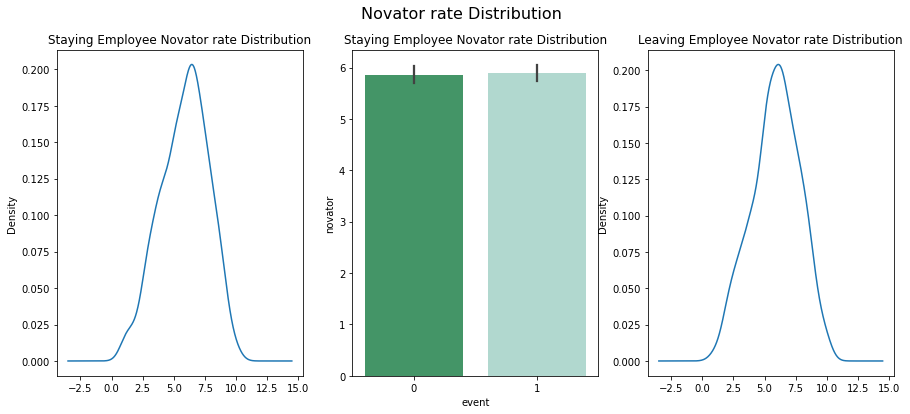

In [130]:
plt.figure(figsize=(15,6))
plt.suptitle("Novator rate Distribution",size=16)

plt.subplot(1,3,1)
plt.title("Staying Employee Novator rate Distribution")
data[data["event"] == 0]["novator"].plot(kind="kde")

plt.subplot(1,3,2)
plt.title("Staying Employee Novator rate Distribution")
sns.barplot(data= data, x="event", y="novator", palette="BuGn_r")

plt.subplot(1,3,3)
plt.title("Leaving Employee Novator rate Distribution")
data[data["event"] == 1]["novator"].plot(kind="kde")

In [131]:
#create bootstrap distribution 
bootstrap_novator_turnover = create_bootstrap_distribution(data[data["event"] == 1 ],"novator")
bootstrap_novator_no_turnover = create_bootstrap_distribution(data[data["event"] == 0 ],"novator")

<AxesSubplot:title={'center':'Leaving Empolyee'}>

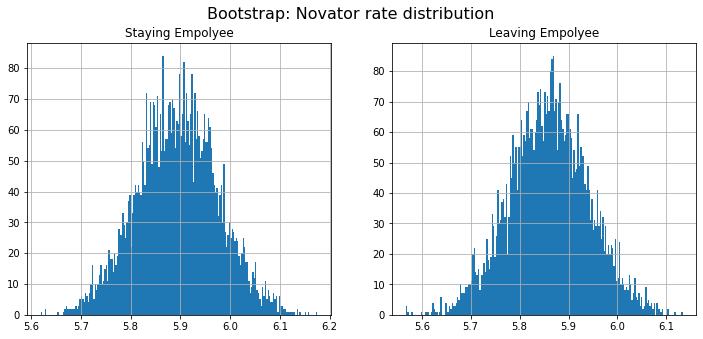

In [132]:
plt.figure(figsize=(12,5))
plt.suptitle("Bootstrap: Novator rate distribution",size=16)
plt.subplot(1,2,1)
plt.title("Staying Empolyee")
bootstrap_novator_turnover.hist(bins=200)
plt.subplot(1,2,2)
plt.title("Leaving Empolyee")
bootstrap_novator_no_turnover.hist(bins=200)


In [133]:
print("Average Novator rate, Turnover:",bootstrap_novator_turnover.mean())
print("Average Novator rate, No Turnover:",bootstrap_novator_no_turnover.mean())

lower_turnover = np.quantile(bootstrap_novator_turnover,0.025)
upper_turnover = np.quantile(bootstrap_novator_turnover,0.975)

lower_no_turnover = np.quantile(bootstrap_novator_no_turnover,0.025)
upper_no_turnover = np.quantile(bootstrap_novator_no_turnover,0.975)

print(f"Confidence Interval No turnover , 95%: [{lower_no_turnover},{upper_no_turnover}]")
print(f"Confidence Interval Turnover , 95%: [{lower_turnover},{upper_turnover}]")


Average Novator rate, Turnover: 5.894111
Average Novator rate, No Turnover: 5.859615971223022
Confidence Interval No turnover , 95%: [5.698381294964029,6.0225]
Confidence Interval Turnover , 95%: [5.734102678571429,6.0526875]


**Hypothesis testing**
- H0 : the average of Novator rate of the employees who left the company (Turnover) **is the same as** the average Novator rate of those who are staying (No Turnover) 
- H1 : the average of Novator rate of the employees who left the company **is different than** the average Novator rate of those who are staying (No Turnover)

In [134]:
#perform ttest 
pingouin.ttest(data[data["event"] == 1]["novator"],data[data["event"] == 0]["novator"],"two-tailed")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.317383,1113.918448,two-sided,0.751012,"[-0.19, 0.26]",0.019001,0.071,0.061598


- **P-value > 0.05 => fail to reject the H0** 
-> the average of Novator rate of the employees who left the company (Turnover) **is the same as** the average Novator rate of those who are staying (No Turnover) 

## Conclusion

After conducting a comprehensive statistical analysis on employee turnover, we identified several factors that have a statistically significant impact on whether employees choose to leave the company. These factors include:
- Experience
- Age 
- Industry
- Profession
- Traffic
- Way
- Anxiety
>(9 factors were not statistically significant in relation to employee turnover.) (eliminated)